## Real Estate Price Prediction in Pakistan

---
### `Author:`  Rana Umar
### `Dataset:` raw_data_zameen.com
### `Link:` https://www.kaggle.com/datasets/hassaanmustafavi/real-estate-dataset-pakistan
---

### About Dataset:

`index`	 Unique identifier for each property.</br>
`url`	 Link to the property listing on Zameen.com.</br>
`type`	 Property type (e.g., House, Flat, Plot).</br>
`purpose`	Purpose of the property (e.g., For Sale, For Rent).</br>
`area`	Size of the property (e.g., 1 Kanal, 14.2 Marla).</br>
`bedroom`  Number of bedrooms available.</br>
`bath`	Number of bathrooms available.</br>
`added`	Days since the property was listed.</br>
`price`	Total price of the property.</br>
`initial_amount`	Initial down payment (if applicable).</br>
`monthly_installment`	Monthly installment amount (if applicable).</br>
`remaining_installments`	Number of installments left (if applicable).</br>
`location`	General location of the property (e.g., DHA Defence).</br>
`location_city`	City where the property is located (e.g., Islamabad).</br>
`location_province`	Province where the property is located (e.g., Islamabad Capital).</br>
`country`	Country of the property (always Pakistan).</br>

### what we cover:
- **Basic info of dataset:** *Get an overview of data structure and types.*

- **Duplicate removal:** *Remove repeated rows to ensure data quality.*

- **Missing values imputation:** *Fill or handle missing data appropriately.*

- **Type correction:** *Convert columns to correct data types.*

- **Univariate analysis:** *Explore each feature individually (distribution, outliers, etc.).*

- **Bivariate & multivariate analysis:** *Explore relationships between two or more features.*

- **Outlier detection & handling:** *Identify and decide how to handle extreme values.*

- **Feature Generation:** *Create or transform features for better modeling.*

- **Feature scaling:** *Normalize or standardize features if needed.*

- **Encoding categorical variables:** *Convert categorical data to numeric format.*

- **Feature selection:** *Select the most relevant features for modeling.*

- **Split data into train and test:** *Divide data for training and evaluation.*

- **Model training:** *Train machine learning models.*

- **Validation Metrix:** *Use validation metix to esses model performance*

- **Model testing:** *Evaluate model performance on the test set.*

- **Pipleline creation:** *create pipline to deploy model in production envorenmnet*

## import libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, LabelEncoder, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df=pd.read_csv("../../Datasets/raw_data_zameen.csv")
prev_df=df
df.head(3)

index                                                url   type   purpose  \
0      0  https://www.zameen.com/Property/dha_defence_dh...  House  For Sale   
1      1  https://www.zameen.com/Property/g_15_g-15_1_in...  House  For Sale   
2      2  https://www.zameen.com/Property/islamabad_g-16...  House  For Sale   

         area bedroom bath       added          price initial_amount  \
0     1 Kanal       7    6  4 days ago  PKR\n19 Crore            NaN   
1  14.2 Marla       6    6  4 days ago   PKR\n6 Crore            NaN   
2     1 Kanal       8    7  4 days ago   PKR\n7 Crore            NaN   

  monthly_installment remaining_installments     location location_city  \
0                 NaN                    NaN  DHA Defence     Islamabad   
1                 NaN                    NaN         G-15     Islamabad   
2                 NaN                    NaN         G-16     Islamabad   

    location_province   country  
0   Islamabad Capital  Pakistan  
1   Islamabad Capital  Pakistan  
2   Islamabad Capital  Pakistan

## Basic info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53255 entries, 0 to 53254
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   53255 non-null  int64 
 1   url                     53255 non-null  object
 2   type                    53255 non-null  object
 3   purpose                 53255 non-null  object
 4   area                    53255 non-null  object
 5   bedroom                 53255 non-null  object
 6   bath                    53255 non-null  object
 7   added                   53255 non-null  object
 8   price                   53255 non-null  object
 9   initial_amount          743 non-null    object
 10  monthly_installment     743 non-null    object
 11  remaining_installments  743 non-null    object
 12  location                53255 non-null  object
 13  location_city           53255 non-null  object
 14  location_province       52098 non-null  object
 15  co

In [5]:
df.shape

(53255, 16)

In [6]:
df.describe()

index
count  53255.00000
mean   26627.00000
std    15373.53863
min        0.00000
25%    13313.50000
50%    26627.00000
75%    39940.50000
max    53254.00000

`for now there is only one numeric column, so we will again check description after type correction in below steps.`

In [7]:
df.columns

Index(['index', 'url', 'type', 'purpose', 'area', 'bedroom', 'bath', 'added',
       'price', 'initial_amount', 'monthly_installment',
       'remaining_installments', 'location', 'location_city',
       'location_province', 'country'],
      dtype='object')

`Remove unusefull columns`

In [8]:
df.drop(columns={'index', 'url'}, inplace=True)

## Duplicate Removal

In [9]:
df.duplicated().sum()

6084

In [10]:
df=df.drop_duplicates()

## Null values handling

In [11]:
missing_no=df.isnull().sum()
print(missing_no)

type                          0
purpose                       0
area                          0
bedroom                       0
bath                          0
added                         0
price                         0
initial_amount            46457
monthly_installment       46457
remaining_installments    46457
location                      0
location_city                 0
location_province           826
country                       0
dtype: int64


<Axes: >

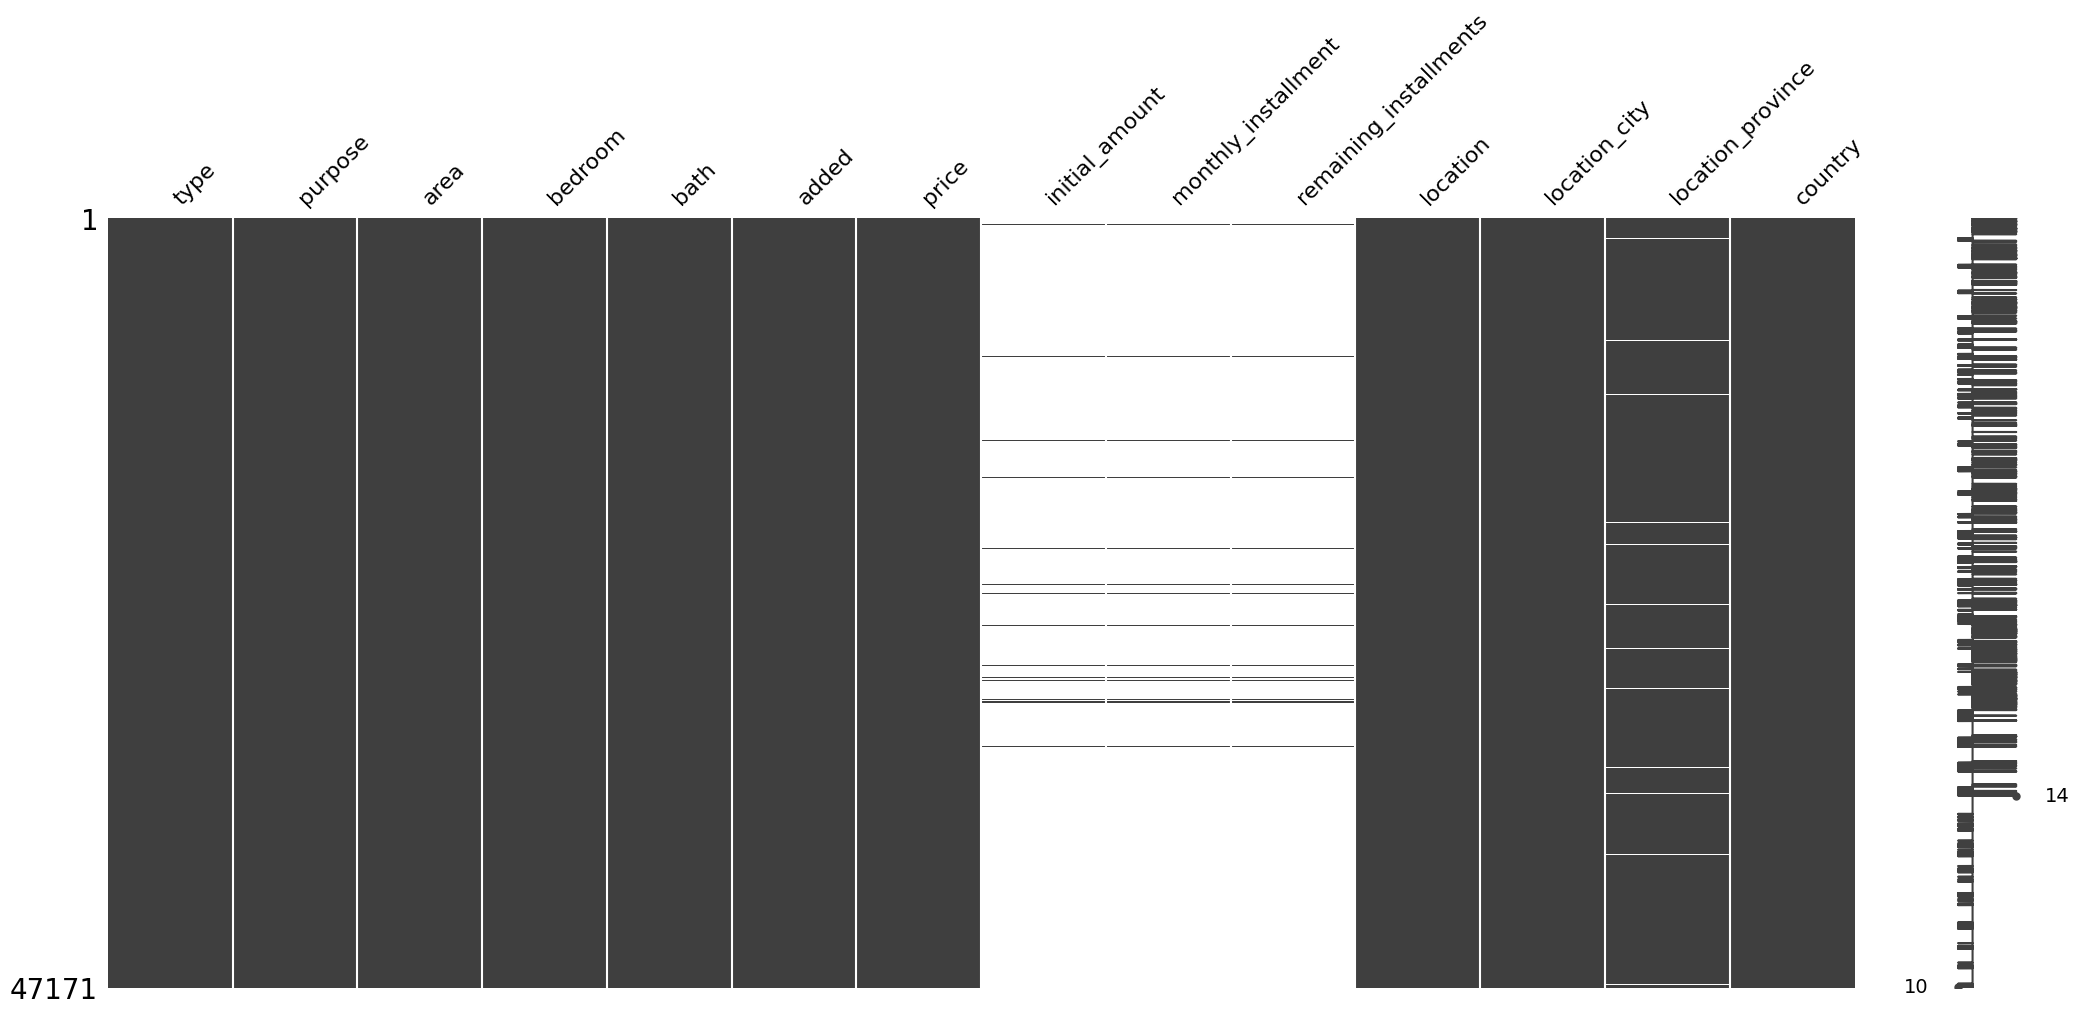

In [12]:
msn.matrix(df)

`The graph show that the values are missing in bulk no dispersion, this mean missingness type is MAR. So we will see what the missing columns have relationship with another columns and take necessay steps.`<br>
`Also there is one more intresting relation b/w null columns, graph show  both have same null vlues at same spots/points`

### Handling null values in initial_amount, mothly and remaining isntallments

In [13]:
df[df['initial_amount'].isnull()].head()

type   purpose        area bedroom bath       added            price  \
0  House  For Sale     1 Kanal       7    6  4 days ago    PKR\n19 Crore   
1  House  For Sale  14.2 Marla       6    6  4 days ago     PKR\n6 Crore   
2  House  For Sale     1 Kanal       8    7  4 days ago     PKR\n7 Crore   
3  House  For Sale     8 Marla       4    6  4 days ago  PKR\n2.65 Crore   
6  House  For Sale   5.3 Marla       1    2  3 days ago     PKR\n70 Lakh   

  initial_amount monthly_installment remaining_installments     location  \
0            NaN                 NaN                    NaN  DHA Defence   
1            NaN                 NaN                    NaN         G-15   
2            NaN                 NaN                    NaN         G-16   
3            NaN                 NaN                    NaN         B-17   
6            NaN                 NaN                    NaN   Pir Sohawa   

  location_city   location_province   country  
0     Islamabad   Islamabad Capital  Pakistan  
1     Islamabad   Islamabad Capital  Pakistan  
2     Islamabad   Islamabad Capital  Pakistan  
3     Islamabad   Islamabad Capital  Pakistan  
6     Islamabad   Islamabad Capital  Pakistan

In [14]:
df[df['initial_amount'].isnull()==False].head()

type   purpose       area bedroom bath        added           price  \
4     Flat  For Sale  2.4 Marla       1    1   4 days ago    PKR\n40 Lakh   
5     Flat  For Sale  2.3 Marla       1    1   4 days ago    PKR\n72 Lakh   
17   House  For Sale    8 Marla       4    4   4 days ago    PKR\n3 Crore   
55    Flat  For Sale  2.7 Marla       1    1    1 day ago    PKR\n50 Lakh   
121   Flat  For Sale  4.7 Marla       1    1  5 hours ago  PKR\n5.6 Crore   

     initial_amount monthly_installment remaining_installments  \
4       PKR\n4 Lakh         PKR\n3 Lakh              12 Months   
5    PKR\n21.6 Lakh       PKR\n1.2 Lakh              36 Months   
17     PKR\n90 Lakh      PKR\n8.75 Lakh              24 Months   
55      PKR\n6 Lakh         PKR\n1 Lakh              44 Months   
121  PKR\n1.4 Crore     PKR\n13.99 Lakh              30 Months   

                          location location_city   location_province   country  
4    Islamabad - Murree Expressway     Islamabad   Islamabad Capital  Pakistan  
5                      Mumtaz City     Islamabad   Islamabad Capital  Pakistan  
17                            B-17     Islamabad   Islamabad Capital  Pakistan  
55                      Top City 1     Islamabad   Islamabad Capital  Pakistan  
121             Diplomatic Enclave     Islamabad   Islamabad Capital  Pakistan

`As we know that whenever something is sell, we pay the whole payement at once or we pay in installments. After observing columns i have conclude that initial, monthly, remaining installments columns have relationship/depend upon purpose(For Sale, For rent) column. so let observe purpose column.`

In [15]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [16]:
df[(df['purpose'] == 'For Sale') & (df['initial_amount'].isnull()==False)].value_counts().sum()

713

In [17]:
df[(df['purpose'] == 'For Rent') & (df['initial_amount'].isnull()==False)].value_counts().sum()

0

`These observation shows that all the non-null values in initial, monthly, remaining installments belogn to For Sale purpose. and indicating that installments just offer in For Sale.`<br>
`And where the values are null "in most cases they took as these properties not offered at installments"`

`so what will we do is impute all the non-null values with 0 (no-isntallments)`

In [18]:
df[['initial_amount', 'monthly_installment', 'remaining_installments']]=df[['initial_amount', 'monthly_installment', 'remaining_installments']].fillna(0)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3273753790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['initial_amount', 'monthly_installment', 'remaining_installments']]=df[['initial_amount', 'monthly_installment', 'remaining_installments']].fillna(0)


### Handle missing value in location province

In [19]:
# Check if missing values in location_province are randomly scattered
missing_province = df[df['location_province'].isnull()]
print('Rows with missing location_province:', missing_province.shape[0])
print('Sample rows with missing location_province:')
display(missing_province.head())

# Compare with other columns to see if missingness is related to city or type
print('Missing location_province by city:')
print(missing_province['location_city'].value_counts())
print('Missing location_province by property type:')
print(missing_province['type'].value_counts())


Rows with missing location_province: 826
Sample rows with missing location_province:


type   purpose       area bedroom bath        added  \
1258      House  For Sale   15 Marla       -    -  3 years ago   
1259      House  For Sale    5 Marla       -    -  4 years ago   
1260  Penthouse  For Sale  0.1 Marla       6    2  8 years ago   
1261      House  For Sale    3 Kanal       6    5  8 years ago   
1262      House  For Sale    0 Marla       6    5  8 years ago   

                 price initial_amount monthly_installment  \
1258    PKR\n3.7 Crore              0                   0   
1259     PKR\n2.5 Lakh              0                   0   
1260  PKR\n12.12 Crore              0                   0   
1261      PKR\n1 Crore              0                   0   
1262      PKR\n1 Crore              0                   0   

     remaining_installments     location location_city location_province  \
1258                      0  Abdul Hakim        Punjab               NaN   
1259                      0  Abdul Hakim        Punjab               NaN   
1260                      0  Abdul Hakim        Punjab               NaN   
1261                      0  Abdul Hakim        Punjab               NaN   
1262                      0  Abdul Hakim        Punjab               NaN   

       country  
1258  Pakistan  
1259  Pakistan  
1260  Pakistan  
1261  Pakistan  
1262  Pakistan

Missing location_province by city:
location_city
Punjab                518
Sindh                 149
Khyber Pakhtunkhwa     90
Azad Kashmir           33
Balochistan            23
Gilgit Baltistan       13
Name: count, dtype: int64
Missing location_province by property type:
type
House                227
Residential Plot     118
Agricultural Land    101
Shop                  88
Building              64
Commercial Plot       47
Other                 37
Factory               34
Flat                  27
Farm House            24
Office                15
Warehouse             13
Industrial Land       11
Room                   5
Lower Portion          5
Upper Portion          4
Plot Form              3
Plot File              2
Penthouse              1
Name: count, dtype: int64


`As we clearly seen that in city provinces are showed and this is clear data anamoly, we will replace these with province respected cell`

In [20]:
# Check unique values (first 20) to inspect for hidden characters or spaces
print(df['location_city'].unique()[:20])


[' Islamabad' ' Karachi' ' Lahore' ' Rawalpindi' ' Abbottabad' ' Punjab'
 ' Ahmedpur East' ' Alipur' ' Arifwala' ' Astore' ' Attock' ' Awaran'
 ' Badin' ' Bagh' ' Azad Kashmir' ' Bahawalnagar' ' Bahawalpur' ' Balakot'
 ' Bannu' ' Barnala']


In [21]:
(df['location_city']==' Punjab').value_counts()

location_city
False    46653
True       518
Name: count, dtype: int64

In [22]:
province_in_city=df.loc[(df['location_city'].isin(df['location_province'])), 'location_city']

for province in province_in_city.unique():

    mask=((df['location_city']==province) & (df['location_province'].isnull()))

    df.loc[mask, 'location_province']=province.strip()

In [23]:
df['location_province'].isnull().sum()

0

`Now we will impute NaN values at the place where province show as city`

In [24]:
mask=(df['location_city'].isin(province_in_city.unique()))
df.loc[mask, 'location_city']=np.nan

In [25]:
df[df['location_city'].isnull()]['location'].unique()

array(['Abdul Hakim', 'Arifwala', 'Bagh', 'Bhimber', 'Charsadda',
       'Dera Ismail Khan', 'Ahmedpur East', 'Alipur', 'Depalpur', 'Dina',
       'Ali Masjid', 'Chichawatni', 'Chishtian', 'Chunian', 'Haroonabad',
       'Haveli Lakha', 'Hunza', 'Jampur', 'Jaranwala', 'Jauharabad',
       'Kabirwala', 'Kaghan', 'Kotri', 'Lalamusa', 'Lasbela', 'Lodhran',
       'Muridke', 'Nankana Sahib', 'Narowal', 'Nawabshah', 'Pattoki',
       'Pindi Bhattian', 'Renala Khurd', 'Samundri', 'Sangla Hill',
       'Shikarpur', 'Skardu', 'Tando Adam', 'Tando Muhammad Khan',
       'Gwadar', 'Hafizabad', 'Hasilpur', 'Khairpur', 'Rawalakot',
       'Sadiqabad', 'Swabi', 'Gharo', 'Gilgit', 'Hub Chowki', 'Kamalia',
       'Lakki Marwat', 'Rajanpur', 'Toba Tek Singh', 'Kotli', 'Mansehra',
       'Bannu', 'Chishtian Sharif', 'Chitral', 'Duniya Pur', 'Dijkot',
       'Barnala', 'Daharki', 'Gambat', 'Ghotki', 'Gojra', 'Hala', 'Hangu',
       'Harappa', 'Jalalpur Jattan', 'Karak', 'Kot Addu', 'Layyah',
       'Mat

`After observing the vlaues that are NaN with respect to location, i have conclude that all the location values where the city is NaN is actually also city value.`

`I think the user has buy the property in the city itself that why the location show and city is NaN. so we will impute all the NaN values with alongside cell value of location.`

In [26]:
location=df.loc[(df['location_city'].isnull()), 'location']

for city in location.unique():
    df.loc[(df['location']==city), 'location_city']=city

In [27]:
df.isnull().sum()

type                      0
purpose                   0
area                      0
bedroom                   0
bath                      0
added                     0
price                     0
initial_amount            0
monthly_installment       0
remaining_installments    0
location                  0
location_city             0
location_province         0
country                   0
dtype: int64

## Type correction

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47171 entries, 0 to 53254
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   type                    47171 non-null  object
 1   purpose                 47171 non-null  object
 2   area                    47171 non-null  object
 3   bedroom                 47171 non-null  object
 4   bath                    47171 non-null  object
 5   added                   47171 non-null  object
 6   price                   47171 non-null  object
 7   initial_amount          47171 non-null  object
 8   monthly_installment     47171 non-null  object
 9   remaining_installments  47171 non-null  object
 10  location                47171 non-null  object
 11  location_city           47171 non-null  object
 12  location_province       47171 non-null  object
 13  country                 47171 non-null  object
dtypes: object(14)
memory usage: 5.4+ MB


### 1. Type

In [29]:
# 1. Type (have small amount of categories)
print(f"unique types in type col: {df.type.nunique()}/{len(df.type)}") # should be category in type
df['type']=df['type'].astype('category')

unique types in type col: 21/47171


C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3821424269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type']=df['type'].astype('category')


### 2. purpose (Only two unique values)

In [30]:
# 2. purpose (Only two unique values)
df['purpose']=df['purpose'].astype('category')

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\976130017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purpose']=df['purpose'].astype('category')


### 3. area

In [31]:
# 3. area
df['area'].unique()

array(['1 Kanal', '14.2 Marla', '8 Marla', ..., '155.6 Kanal',
       '725 Sq. Yd.', '495 Sq. Yd.'], dtype=object)

In [32]:
df=df[df['area']!='-']

In [33]:
# Area (should be float and in single unit e.g square feet (sqft))
def to_squarefeet(value):
    if 'Kanal' in value:
        kanal = float(value.replace('Kanal', '').replace(',', '').strip())
        marla = kanal * 20
        sqft = marla * 225
        return sqft
    if 'Marla' in value:
        marla = float(value.replace('Marla', '').replace(',', '').strip())
        sqft = marla * 225
        return sqft
    if 'Sq. Yd.' in value:
        sqyd = float(value.replace('Sq. Yd.', '').replace(',', '').strip())
        sqft = sqyd * 9
        return sqft

df['area']=df['area'].apply(to_squarefeet)
df.rename(columns={'area':'area(sqft)'}, inplace=True)
print(df['area(sqft)'].dtypes)

float64


`Here we are converting the area into single unit suqarefeet`

### 4. & 5. bedroom & bath

In [34]:
# 4. & 5. bedroom & bath
df['bedroom'].unique()

array(['7', '6', '8', '4', '1', '3', '2', '5', '9', '-', '10', '11', '12',
       '13', '200', '20', '16', '100', '15', '14', '18', '24', '22', '17'],
      dtype=object)

In [35]:
df[df['bedroom']=='-'].head()

type   purpose  area(sqft) bedroom bath       added  \
60         Flat  For Sale       540.0       -    1  4 days ago   
83        House  For Sale      2250.0       -    -  4 days ago   
100       House  For Sale      7200.0       -    -  1 week ago   
173  Farm House  For Sale      1800.0       -    -  3 days ago   
191        Flat  For Sale       720.0       -    1  1 week ago   

               price  initial_amount monthly_installment  \
60      PKR\n68 Lakh               0                   0   
83   PKR\n5.25 Crore               0                   0   
100    PKR\n31 Crore               0                   0   
173     PKR\n78 Lakh               0                   0   
191  PKR\n1.07 Crore  PKR\n26.7 Lakh      PKR\n2.67 Lakh   

    remaining_installments location location_city   location_province  \
60                       0  Gulberg     Islamabad   Islamabad Capital   
83                       0     B-17     Islamabad   Islamabad Capital   
100                      0      F-6     Islamabad   Islamabad Capital   
173                      0   Others     Islamabad   Islamabad Capital   
191              30 Months     B-17     Islamabad   Islamabad Capital   

      country  
60   Pakistan  
83   Pakistan  
100  Pakistan  
173  Pakistan  
191  Pakistan

`There is problem with bath and beroom numbers. They show '-'. lets fix them`

In [36]:
print(list(df[df['bedroom']=='-']['type'].unique()))

['Flat', 'House', 'Farm House', 'Room', 'Penthouse', 'Upper Portion', 'Lower Portion', 'Residential Plot', 'Commercial Plot', 'Plot File', 'Industrial Land', 'Agricultural Land', 'Plot Form', 'Shop', 'Other', 'Office', 'Building', 'Factory', 'Warehouse', 'Commercial']


In [37]:
df[df['bedroom']=='-'].value_counts().sum()

26246

In [38]:
# Get all types that should have 0 bedrooms and baths
zero_bed_bath_types = ['Residential Plot', 'Commercial Plot', 'Plot File', 'Industrial Land', 
                       'Agricultural Land', 'Plot Form', 
                       'Shop', 'Office', 'Warehouse']

# Set bedroom and bath to 0 for these types
df.loc[df['type'].isin(zero_bed_bath_types), ['bedroom', 'bath']] = 0

In [39]:
df[df['bedroom']=='-'].value_counts().sum()

4097

`we have fill plots and Lands types with 0 bedroom and bath becuse they are just peice of land not any residential thing`

In [40]:
# getting just those types that are have bedrooms and bath in '-'.
fillter_types=df[df['bedroom']=='-']['type']
print(list(fillter_types.unique()))

['Flat', 'House', 'Farm House', 'Room', 'Penthouse', 'Upper Portion', 'Lower Portion', 'Other', 'Building', 'Factory', 'Commercial']


In [41]:
# filling/replacing - with appropriate accurate values
df.loc[:, ['bedroom', 'bath']] = df[['bedroom', 'bath']].replace('-', np.nan)
df.loc[:, ['bedroom', 'bath']] = df[['bedroom', 'bath']].astype('float')

df[['bedroom', 'bath']] = df.groupby(['type', 'area(sqft)'], observed=False)[['bedroom', 'bath']].transform(lambda x: x.fillna(x.median()))

df['bedroom'] = df['bedroom'].fillna(df['bedroom'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())

print(df[['bedroom', 'bath']].dtypes)

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3574230720.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['bedroom', 'bath']] = df.groupby(['type', 'area(sqft)'], observed=False)[['bedroom', 'bath']].transform(lambda x: x.fillna(x.median()))
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3574230720.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['bedroom', 'bath']] = df.groupby(['type', 'area(sqft)'], observed=False)[['bedroom', 'bath']].transform(lambda x: x.fillna(x.median()))
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\3574230720.py

bedroom    float64
bath       float64
dtype: object


In [42]:
df[df.index==28292]

type   purpose  area(sqft)  bedroom  bath       added  \
28292  Office  For Sale       360.0      0.0   0.0  5 days ago   

                price  initial_amount monthly_installment  \
28292  PKR\n94.5 Lakh  PKR\n9.45 Lakh      PKR\n2.36 Lakh   

      remaining_installments     location location_city   location_province  \
28292              36 Months  Mumtaz City     Islamabad   Islamabad Capital   

        country  
28292  Pakistan

`we have fill/replace - with the median of bedroom and bath. We have take midean by conseidring area and type. Both have impact on the bedrooms and bath. More the area and perfect type lead to more bedrooms and bath.`

###  6. added

In [43]:
# 6. added

# we will drop this column, because it does not have much impact on prediction of property price.

### 7. price

In [44]:
# 7. price
df['price'].unique()

array(['PKR\n19 Crore', 'PKR\n6 Crore', 'PKR\n7 Crore', ...,
       'PKR\n2 Thousand', 'PKR\n13.35 Lakh', 'PKR\n5.63 Lakh'],
      dtype=object)

In [45]:
print(df['price'].max())
print(df['price'].min())

PKR
99.99 Lakh
Contact for price


`As price is our target column, so replcaing "contact for price" with any other mean, median or mode will not accurate so, we will remove these rows`

In [46]:
df[df['price']=='Contact for price'].value_counts().sum()

2

In [47]:
df=df[df['price']!='Contact for price']

In [48]:
df['price'].min()

'PKR\n1'

In [49]:
df[df['price']=='1']

Empty DataFrame
Columns: [type, purpose, area(sqft), bedroom, bath, added, price, initial_amount, monthly_installment, remaining_installments, location, location_city, location_province, country]
Index: []

`The sqft show that the price is 1 Arab but due to typo it just written as 1`

In [50]:
df['price']=df['price'].replace('1', '1 Arab')

In [51]:
df['price']=df['price'].str.replace('PKR\n', '')

In [52]:
df.isnull().sum()

type                      0
purpose                   0
area(sqft)                0
bedroom                   0
bath                      0
added                     0
price                     0
initial_amount            0
monthly_installment       0
remaining_installments    0
location                  0
location_city             0
location_province         0
country                   0
dtype: int64

In [53]:
df['price'].str.extract(r'\d+\s*([A-Za-z. ]+)')[0].str.strip().unique()

array(['Crore', '.', 'Lakh', 'Thousand', nan, 'Arab'], dtype=object)

In [54]:
mask = df['price'].str.extract(r'\d+\s*([A-Za-z. ]+)')[0].str.strip().isna()
df_nan_prices = df[mask]
display(df_nan_prices[['price']])

price
1440    396
4840    200
7225    533
7250     55
7263    787
10714   235
10715   456
12402    55
15183   123
21302    88
34944     7
36218     2
41577     2
41594    15
42502     2
42504   258
43605   567
44341     1
45001   123
45309    77
45916    11
47654   200
48842   255

`There is no unit for these prices so we will remove them.`

In [55]:
df=df[~mask]

In [56]:
def cnvt_laks(value):
    if isinstance(value, str):
        if 'Arab' in value:
            value=float(value.replace('Arab', '').strip())
            return value * 10000
        if 'Crore' in value:
            value=float(value.replace('Crore', '').strip())
            return value * 100 
        if 'Lakh' in value:
            value=float(value.replace('Lakh', '').strip())
            return value if value else 1.0
        if 'Thousand' in value:
            value=float(value.replace('Thousand', '').strip())
            return value/100
    else:
        return float(value)

In [57]:
df['price']=df['price'].apply(cnvt_laks)
df.rename(columns={'price': 'price(Lakhs)'}, inplace=True)

In [58]:
df['monthly_installment'].isnull().sum()

0

In [59]:
df[df['monthly_installment'].isnull()]

Empty DataFrame
Columns: [type, purpose, area(sqft), bedroom, bath, added, price(Lakhs), initial_amount, monthly_installment, remaining_installments, location, location_city, location_province, country]
Index: []

### 8, 9. initial_amount,  monthly_installment

In [60]:
# 8, 9. initial_amount,  monthly_installment
df[['initial_amount', 'monthly_installment']] = \
    df[['initial_amount', 'monthly_installment', ]].applymap(
        lambda x: str(x).replace('PKR\n', '') if isinstance(x, str) else x
    )
df[['initial_amount', 'monthly_installment']]=df[['initial_amount', 'monthly_installment']].applymap(cnvt_laks)
df[['initial_amount', 'monthly_installment']].dtypes

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\2608890971.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['initial_amount', 'monthly_installment', ]].applymap(
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\2608890971.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['initial_amount', 'monthly_installment']]=df[['initial_amount', 'monthly_installment']].applymap(cnvt_laks)


initial_amount         float64
monthly_installment    float64
dtype: object

In [61]:
df['monthly_installment']=df['monthly_installment'].fillna(df['monthly_installment'].median())

In [62]:
df.rename(columns={'initial_amount': 'initial_amount(Lakhs)', 'monthly_installment' : 'monthly_installment(Lakhs)'}, inplace=True)
df[['initial_amount(Lakhs)', 'monthly_installment(Lakhs)']].head()

initial_amount(Lakhs)  monthly_installment(Lakhs)
0                    0.0                         0.0
1                    0.0                         0.0
2                    0.0                         0.0
3                    0.0                         0.0
4                    4.0                         3.0

### 10. remaining_installments 


In [63]:
# 10. remaining_installments 
df['remaining_installments'] = df['remaining_installments'].astype(str).str.strip().str.extract(r'(\d+)')
df['remaining_installments'] = df['remaining_installments'].astype('Int64')

### 11, 12, 13. location location_city location_province


In [64]:
# 11, 12, 13. location location_city location_province
print(f"location unique feature: {df['location'].nunique()}/{len(df['location'])}")
print(f"location_city unique feature: {df['location_city'].nunique()}/{len(df['location_city'])}")
print(f"location_provincd unique feature: {df['location_province'].nunique()}/{len(df['location_province'])}")


location unique feature: 2510/47138
location_city unique feature: 326/47138
location_provincd unique feature: 13/47138


`These all are higly categorical feature as it has just few unique values from more than 47000 row.`

In [65]:
df[['location', 'location_city', 'location_province']] = df[['location', 'location_city', 'location_province']].astype('category')

### 14. country

In [66]:
# 14. country
# country column just have pakistan so it not provide any usefull info for prediction of price

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47138 entries, 0 to 53254
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   type                        47138 non-null  category
 1   purpose                     47138 non-null  category
 2   area(sqft)                  47138 non-null  float64 
 3   bedroom                     47138 non-null  float64 
 4   bath                        47138 non-null  float64 
 5   added                       47138 non-null  object  
 6   price(Lakhs)                47138 non-null  float64 
 7   initial_amount(Lakhs)       47138 non-null  float64 
 8   monthly_installment(Lakhs)  47138 non-null  float64 
 9   remaining_installments      47138 non-null  Int64   
 10  location                    47138 non-null  category
 11  location_city               47138 non-null  category
 12  location_province           47138 non-null  category
 13  country              

## Structuring Data (e.g. removing tailing spaces, droping non-usefull columns etc.)

In [68]:
df['location_city']=df['location_city'].str.strip()

In [69]:
df['location_province']=df['location_province'].str.strip()

In [70]:
df.drop(columns={'added', 'country'}, inplace=True)

## Outlier detection

`The graph show that all the numeric columns are highly right skewed so we will use IQR to detect outlier.`

In [71]:
df.shape

(47138, 12)

In [72]:
def IQR(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR= Q3 - Q1
    lower_fance=Q1 - 1.5 * IQR
    upper_fance= Q3 + 1.5 * IQR

    outliers = df[(df[col]< lower_fance) | (df[col]> upper_fance)]
    return outliers

### 1. Area

In [73]:
# let analyze area(aqft)
area_outlier=IQR('area(sqft)')
print(f"total no of row in area(sqft) are: {len(df['area(sqft)'])}")
print(f"total no of outliers in area(sqft) are: {len(area_outlier)}")

total no of row in area(sqft) are: 47138
total no of outliers in area(sqft) are: 4417


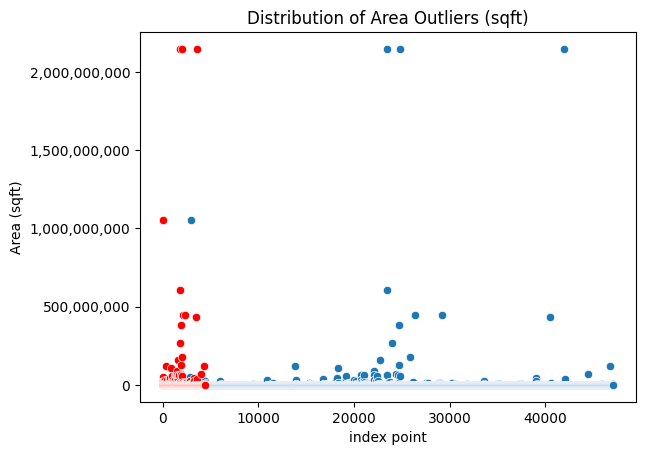

In [74]:
import matplotlib.ticker as mticker
sns.scatterplot(x=range(len(df['area(sqft)'])), y=df['area(sqft)'])
sns.scatterplot(x=range(len(area_outlier)), y=area_outlier['area(sqft)'], color='red')
plt.title('Distribution of Area Outliers (sqft)')
plt.ylabel('Area (sqft)')
plt.xlabel('index point')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

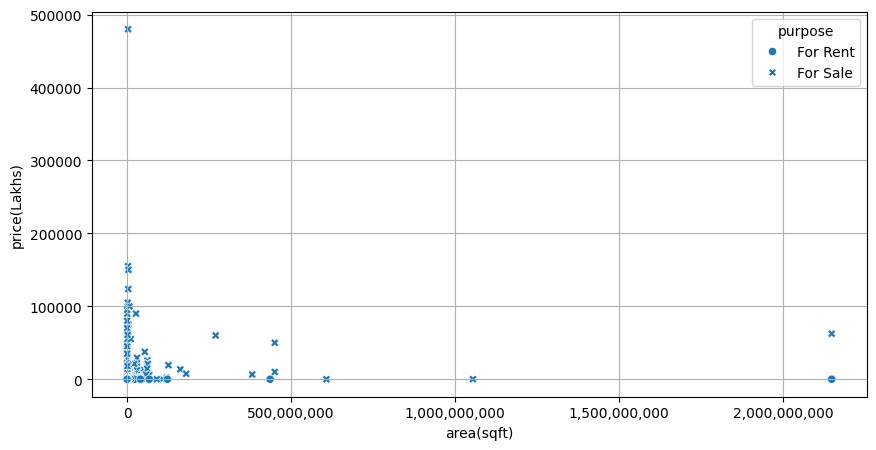

In [75]:
# plotting outlier
plt.figure(figsize=(10,5))
plt.grid(True)
sns.scatterplot(x=area_outlier['area(sqft)'], y=area_outlier['price(Lakhs)'], style='purpose',  data=area_outlier)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [76]:
filtered_outlier=area_outlier[area_outlier['price(Lakhs)']<200000]

In [77]:
filtered_outlier.shape

(4416, 12)

In [78]:
filtered_outlier=filtered_outlier[filtered_outlier['area(sqft)']<500000000]

In [79]:
filtered_outlier.shape

(4411, 12)

`We have filter the data from price that is much high for small aera and small price for large area.`

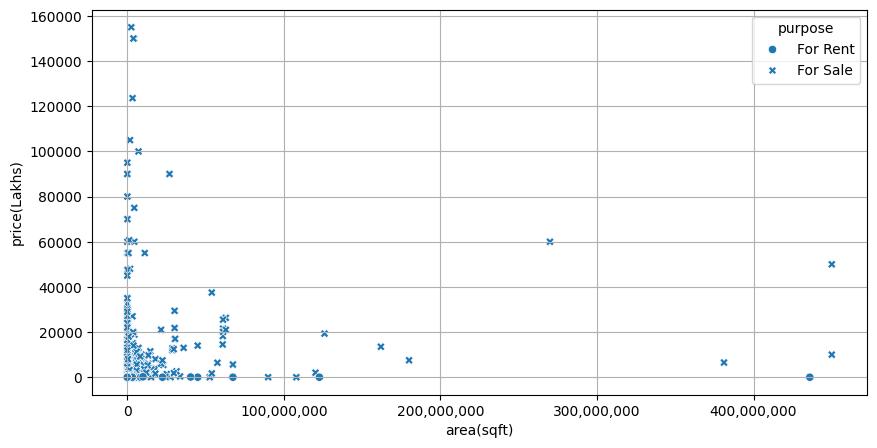

In [80]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.scatterplot(x=filtered_outlier['area(sqft)'], y=filtered_outlier['price(Lakhs)'], style='purpose',  data=filtered_outlier)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

`There are still some points that are far from the main clustor and also seem as outlier because they have large area but small price`

In [81]:
filtered_outlier=filtered_outlier[filtered_outlier['area(sqft)']<200000000]

In [82]:
filtered_outlier.shape

(4406, 12)

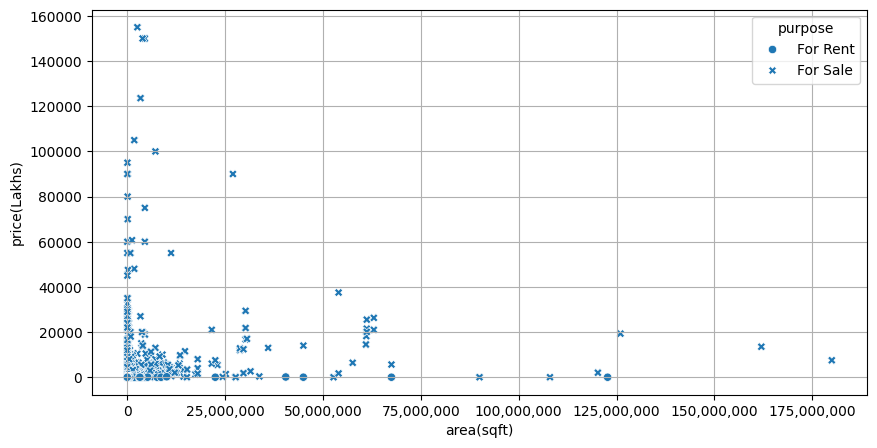

In [83]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.scatterplot(x=filtered_outlier['area(sqft)'], y=filtered_outlier['price(Lakhs)'], style='purpose',  data=filtered_outlier)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

`This distribution seem much better, The small area that have large price is reasonable and in urban area it is usually high for small land and the area that have small price but large area seem as agriculture lands but still seem as reasonable.`

In [84]:
outlier_index = area_outlier[~(area_outlier.index.isin(filtered_outlier.index))].index
df.drop(outlier_index, inplace=True)

In [85]:
df=df[df['price(Lakhs)']!=9000000.0]
df=df[df['price(Lakhs)']!=480000.0]

In [86]:
less_area_type=df.loc[(df['area(sqft)']<225), 'type'].unique()
for typ in less_area_type:
    print(typ)

Penthouse
House
Flat
Farm House
Residential Plot
Plot Form
Plot File
Commercial Plot
Shop
Office
Warehouse
Other
Building
Room
Upper Portion


In [87]:
indexs = df[(df['area(sqft)']<225) & (~(df['type'].isin(['Shop', 'Office', 'Room', 'Flat'])))].index
df.drop(index=indexs, inplace=True)

In [88]:
df=df[df['area(sqft)']!=0.0]

In [89]:
df[(df['area(sqft)']<45) & (df['type']=='Office')]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
40086  Office  For Sale        22.5      0.0   0.0       500.000   
52571  Office  For Rent        22.5      0.0   0.0         0.055   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
40086                    0.0                         0.0   
52571                    0.0                         0.0   

       remaining_installments         location location_city location_province  
40086                       0  Gulgasht Colony        Multan            Punjab  
52571                       0  New Muslim Town        Lahore            Punjab

In [90]:
df.drop(index=[40086, 52571], inplace=True)

In [91]:
df.drop(index=area_outlier.index, inplace=True, errors='ignore')

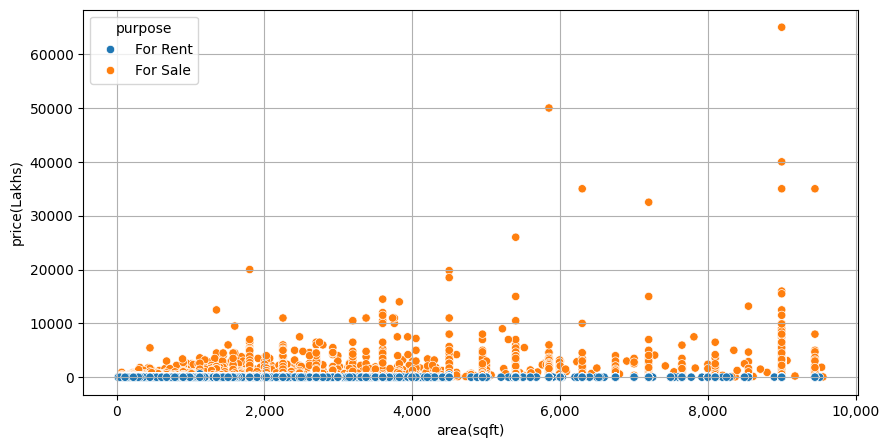

In [92]:
plt.figure(figsize=(10,5))
plt.grid(True)
sns.scatterplot(x=df['area(sqft)'], y=df['price(Lakhs)'], hue='purpose',  data=df)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [93]:
df.shape

(42636, 12)

`The distribution is now much clear and most of the datapoints are in clustor but still some ara far form and we will scale them into feature-scaling section.`

### 2. Bedroom

In [94]:
df=df[df['type']!='Other']

In [95]:
bedroom_outlier=IQR('bedroom')
print(f"total no of row in bedroom are: {len(df['bedroom'])}")
print(f"total no of outliers in bedroom are: {len(bedroom_outlier)}")

total no of row in bedroom are: 42499
total no of outliers in bedroom are: 396


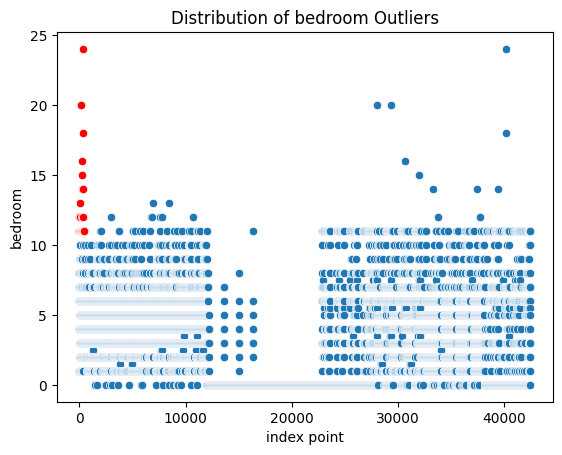

In [96]:
import matplotlib.ticker as mticker
sns.scatterplot(x=range(len(df['bedroom'])), y=df['bedroom'])
sns.scatterplot(x=range(len(bedroom_outlier)), y=bedroom_outlier['bedroom'], color='red')
plt.title('Distribution of bedroom Outliers')
plt.ylabel('bedroom')
plt.xlabel('index point')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

<Axes: xlabel='area(sqft)', ylabel='bedroom'>

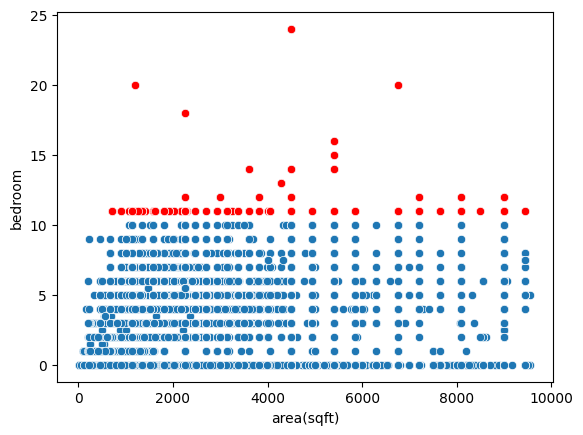

In [97]:
sns.scatterplot(x=df['area(sqft)'], y=df['bedroom'])
sns.scatterplot(x=bedroom_outlier['area(sqft)'], y=bedroom_outlier['bedroom'], color='red')

In [98]:
# Remove rows where type is 'Room' and bedroom > 1
df = df[~((df['type'] == 'Room') & (df['bedroom'] > 1))]

In [99]:
df['bedroom']=df['bedroom'].apply(lambda x: np.floor(x))

In [100]:
df[(df['area(sqft)']<300) & (df['bedroom']>1) & (df['bath']>1)]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
1298           House  For Sale       225.0      3.0   2.0        1.0000   
1299           House  For Sale       225.0      3.0   2.0        0.1000   
2997           House  For Sale       225.0      4.0   4.0       98.5000   
4709           House  For Sale       225.0      3.0   2.0        1.0000   
4711           House  For Sale       225.0      3.0   2.0        5.0000   
4726           House  For Sale       225.0      3.0   2.0        5.1000   
4764           House  For Sale       225.0      3.0   2.0        0.1000   
4821           House  For Sale       247.5      3.0   2.0       17.5000   
6185           House  For Sale       270.0      2.0   2.0       70.0000   
6432           House  For Sale       225.0      3.0   2.0        0.1235   
6542           House  For Sale       225.0      3.0   2.0       22.2200   
7562           House  For Sale       225.0      3.0   2.0        2.2200   
8059           House  For Sale       225.0      3.0   3.0       90.0000   
8341           House  For Sale       225.0      3.0   2.0       22.0000   
9064            Flat  For Sale       153.0      4.0   4.0       75.0000   
9807           House  For Sale       225.0      3.0   3.0       30.0000   
10148          House  For Sale       225.0      3.0   2.0       48.0000   
11896          House  For Sale       225.0      4.0   2.0       65.0000   
12393          House  For Sale       225.0      3.0   2.0      220.0000   
13600          House  For Sale       225.0      3.0   2.0       68.0000   
13650          House  For Sale       225.0      3.0   2.0       48.0000   
28896       Building  For Sale       292.5      2.0   2.0      150.0000   
32414       Building  For Sale       225.0      2.0   3.0       68.0000   
32487       Building  For Sale       225.0      2.0   3.0      110.0000   
34769       Building  For Sale       225.0      2.0   3.0      600.0000   
35302           Flat  For Rent       202.5      2.0   2.0        0.8000   
36398       Building  For Sale       225.0      2.0   3.0       70.0000   
36712       Building  For Sale       225.0      2.0   3.0       85.0000   
37514  Lower Portion  For Rent       243.0      3.0   4.0        0.3800   
38120       Building  For Sale       225.0      2.0   3.0      150.0000   
38552       Building  For Sale       292.5      2.0   2.0      180.0000   
43274          House  For Rent       225.0      9.0   6.0        1.7000   
43290          House  For Rent       225.0      2.0   2.0        0.2000   
45005          House  For Rent       225.0      3.0   2.0        0.0100   
45025          House  For Rent       225.0      2.0   2.0        0.1500   
46695           Flat  For Rent       202.5      3.0   2.0        1.0000   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
1298                     0.0                         0.0   
1299                     0.0                         0.0   
2997                     0.0                         0.0   
4709                     0.0                         0.0   
4711                     0.0                         0.0   
4726                     0.0                         0.0   
4764                     0.0                         0.0   
4821                     0.0                         0.0   
6185                     0.0                         0.0   
6432                     0.0                         0.0   
6542                     0.0                         0.0   
7562                     0.0                         0.0   
8059                     0.0                         0.0   
8341                     0.0                         0.0   
9064                     0.0                         0.0   
9807                     0.0                         0.0   
10148                    0.0                         0.0   
11896                    0.0                         0.0   
12393                    0.0                         0.0   
13600                    0.0            

In [101]:
df=df[~((df['area(sqft)']<300) & (df['bedroom']>1) & (df['bath']>1))]

`It is not possible to have property that have 1 marla area and bath and bedroom >1`

In [102]:
# List rows with very small area and large number of bedrooms
spike_rows = df[(df['area(sqft)'] < 750) & (df['bedroom'] > 3) & (df['bath'] > 3) & (df['type']!='Building')]
display(spike_rows)

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
488    House  For Sale       540.0      5.0   5.0         85.00   
612    House  For Sale       675.0      4.0   4.0        115.00   
762    House  For Sale       675.0      4.0   4.0        150.00   
1209   House  For Sale       675.0      5.0   5.0        100.00   
1497   House  For Sale       675.0      5.0   4.0        170.00   
...      ...       ...         ...      ...   ...           ...   
45667  House  For Rent       675.0      4.0   4.0          0.37   
45710  House  For Rent       675.0      7.0   6.0          0.65   
47352  House  For Rent       450.0      4.0   4.0          0.40   
47365  House  For Rent       450.0      5.0   5.0          0.32   
47411  House  For Rent       675.0      4.0   4.0          0.32   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
488                      0.0                         0.0   
612                      0.0                         0.0   
762                      0.0                         0.0   
1209                     0.0                         0.0   
1497                     0.0                         0.0   
...                      ...                         ...   
45667                    0.0                         0.0   
45710                    0.0                         0.0   
47352                    0.0                         0.0   
47365                    0.0                         0.0   
47411                    0.0                         0.0   

       remaining_installments              location location_city  \
488                         0               Korangi       Karachi   
612                         0             Jora Pull        Lahore   
762                         0            Johar Town        Lahore   
1209                        0  Chaudhary Jan Colony    Rawalpindi   
1497                        0            Jhang Road    Faisalabad   
...                       ...                   ...           ...   
45667                       0           Warsak Road      Peshawar   
45710                       0             Hayatabad      Peshawar   
47352                       0               Gulberg      Peshawar   
47365                       0           Warsak Road      Peshawar   
47411                       0           Warsak Road      Peshawar   

        location_province  
488                 Sindh  
612                Punjab  
762                Punjab  
1209               Punjab  
1497               Punjab  
...                   ...  
45667  Khyber Pakhtunkhwa  
45710  Khyber Pakhtunkhwa  
47352  Khyber Pakhtunkhwa  
47365  Khyber Pakhtunkhwa  
47411  Khyber Pakhtunkhwa  

[129 rows x 12 columns]

`it is not possible to have more than 3,3 bed and bath if type is not building`

In [103]:
df=df[~((df['area(sqft)'] < 750) & (df['bedroom'] > 3) & (df['bath'] > 3) & (df['type']!='Building'))]

In [104]:
spike_rows = df[(df['area(sqft)'] < 500) & (df['bedroom'] > 6)]
df.drop(index=spike_rows.index, inplace=True)

In [105]:
print(bedroom_outlier['bedroom'].max())
print(bedroom_outlier['bedroom'].min())

24.0
11.0


In [106]:
bedroom_outlier['type'].unique()

['House', 'Building']
Categories (21, object): ['Agricultural Land', 'Building', 'Commercial', 'Commercial Plot', ..., 'Room', 'Shop', 'Upper Portion', 'Warehouse']

In [107]:
bedroom_outlier[bedroom_outlier['type']=='Building']

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
28311  Building  For Sale      3600.0     11.0   7.0        6500.0   
28384  Building  For Sale       900.0     11.0   6.0        1085.0   
28391  Building  For Sale      3600.0     11.0   6.0        4200.0   
28438  Building  For Sale      1125.0     11.0   7.0         403.0   
28444  Building  For Sale      3600.0     11.0   6.0       10000.0   
...         ...       ...         ...      ...   ...           ...   
53128  Building  For Rent      5850.0     11.0   7.0           0.9   
53173  Building  For Rent      6750.0     11.0   7.0           1.5   
53187  Building  For Rent      5850.0     11.0   7.0           3.0   
53221  Building  For Rent      5400.0     11.0   6.0           5.0   
53239  Building  For Rent      5400.0     11.0   6.0           1.6   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
28311                    0.0                         0.0   
28384                    0.0                         0.0   
28391                    0.0                         0.0   
28438                    0.0                         0.0   
28444                    0.0                         0.0   
...                      ...                         ...   
53128                    0.0                         0.0   
53173                    0.0                         0.0   
53187                    0.0                         0.0   
53221                    0.0                         0.0   
53239                    0.0                         0.0   

       remaining_installments              location location_city  \
28311                       0                  I-10     Islamabad   
28384                       0           Bahria Town     Islamabad   
28391                       0           Bahria Town     Islamabad   
28438                       0         Pakistan Town     Islamabad   
28444                       0                   F-8     Islamabad   
...                       ...                   ...           ...   
53128                       0             Ransinwal       Narowal   
53173                       0  Manga - Raiwind Road       Raiwind   
53187                       0        Sahiwal Bypass       Sahiwal   
53221                       0                 Kalam          Swat   
53239                       0    Multan Vehari Road        Vehari   

        location_province  
28311   Islamabad Capital  
28384   Islamabad Capital  
28391   Islamabad Capital  
28438   Islamabad Capital  
28444   Islamabad Capital  
...                   ...  
53128              Punjab  
53173              Punjab  
53187              Punjab  
53221  Khyber Pakhtunkhwa  
53239              Punjab  

[333 rows x 12 columns]

In [108]:
print(df.loc[(df['type']=='Building'), ['area(sqft)','bedroom', 'bath']].max())
print(df.loc[(df['type']=='Building'), ['area(sqft)','bedroom', 'bath']].min())

area(sqft)    9450.0
bedroom         24.0
bath            10.0
dtype: float64
area(sqft)    247.5
bedroom         0.0
bath            0.0
dtype: float64


In [109]:
bedroom_outlier[bedroom_outlier['type']=='House']

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
233    House  For Sale      4500.0     11.0   7.0         395.0   
331    House  For Sale      2304.0     11.0   7.0         650.0   
2046   House  For Sale      2160.0     11.0   7.0        1050.0   
2093   House  For Sale      3600.0     11.0   6.0         900.0   
3135   House  For Sale      4500.0     12.0   2.0         300.0   
...      ...       ...         ...      ...   ...           ...   
46763  House  For Rent      4500.0     14.0   6.0           0.8   
47045  House  For Rent      9000.0     12.0   5.0           1.2   
47119  House  For Rent      7200.0     12.0   9.0           0.6   
47150  House  For Rent      4500.0     11.0   9.0           1.2   
47428  House  For Rent      4950.0     11.0  10.0           2.2   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
233                      0.0                         0.0   
331                      0.0                         0.0   
2046                     0.0                         0.0   
2093                     0.0                         0.0   
3135                     0.0                         0.0   
...                      ...                         ...   
46763                    0.0                         0.0   
47045                    0.0                         0.0   
47119                    0.0                         0.0   
47150                    0.0                         0.0   
47428                    0.0                         0.0   

       remaining_installments              location    location_city  \
233                         0             Bani Gala        Islamabad   
331                         0             Scheme 33          Karachi   
2046                        0  Gulshan-e-Iqbal Town          Karachi   
2093                        0  Gulshan-e-Iqbal Town          Karachi   
3135                        0     New Depalpur City         Depalpur   
...                       ...                   ...              ...   
46763                       0                Others  Dera Ghazi Khan   
47045                       0                Others            Jhang   
47119                       0                 Kotli            Kotli   
47150                       0     Ghazikot Township         Mansehra   
47428                       0           Jinnah Town           Quetta   

        location_province  
233     Islamabad Capital  
331                 Sindh  
2046                Sindh  
2093                Sindh  
3135               Punjab  
...                   ...  
46763              Punjab  
47045              Punjab  
47119        Azad Kashmir  
47150  Khyber Pakhtunkhwa  
47428         Balochistan  

[63 rows x 12 columns]

In [110]:
print(df.loc[(df['type']=='House'), ['area(sqft)','bedroom', 'bath']].max())
print(df.loc[(df['type']=='House'), ['area(sqft)','bedroom', 'bath']].min())

area(sqft)    9540.0
bedroom         14.0
bath            10.0
dtype: float64
area(sqft)    225.0
bedroom         0.0
bath            0.0
dtype: float64


In [111]:
df[(df['type']=='House') & (df['area(sqft)']<=225)]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
1468   House  For Sale       225.0      1.0   1.0          37.5   
7412   House  For Sale       225.0      2.0   1.0          10.0   
7413   House  For Sale       225.0      2.0   1.0          10.0   
11853  House  For Sale       225.0      2.0   1.0          38.0   
12592  House  For Sale       225.0      2.0   1.0           8.5   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
1468                     0.0                         0.0   
7412                     0.0                         0.0   
7413                     0.0                         0.0   
11853                    0.0                         0.0   
12592                    0.0                         0.0   

       remaining_installments       location location_city location_province  
1468                        0    Bilal Nagar    Faisalabad            Punjab  
7412                        0      Jaranwala     Jaranwala            Punjab  
7413                        0      Jaranwala     Jaranwala            Punjab  
11853                       0  Hajipura Road       Sialkot            Punjab  
12592                       0      Jaranwala     Jaranwala            Punjab

In [112]:
print(df.loc[(df['type']=='Room'), ['area(sqft)','bedroom', 'bath']].max())
print(df.loc[(df['type']=='Room'), ['area(sqft)','bedroom', 'bath']].min())

area(sqft)    4500.0
bedroom          1.0
bath             2.0
dtype: float64
area(sqft)    90.0
bedroom        0.0
bath           0.0
dtype: float64


In [113]:
print(df.loc[(df['type']=='Farm House'), ['area(sqft)','bedroom', 'bath']].max())
print(df.loc[(df['type']=='Farm House'), ['area(sqft)','bedroom', 'bath']].min())

area(sqft)    9000.0
bedroom          7.0
bath             6.0
dtype: float64
area(sqft)    900.0
bedroom         0.0
bath            0.0
dtype: float64


`Building can have small rooms so it is possible to have 12, 15, 13, and even 20 rooms in 1 kanal but not in house.`

In [114]:
bedroom_outlier.value_counts().sum()

396

In [115]:
filterB_outlier = bedroom_outlier[~((bedroom_outlier['type']=='Building') & (bedroom_outlier['bedroom']>=11) & (bedroom_outlier['area(sqft)']<2300))]
filterB_outlier = filterB_outlier[~((filterB_outlier['type']=='House') & (filterB_outlier['bedroom']>6) & (filterB_outlier['area(sqft)']<4500))]
filterB_outlier = filterB_outlier[~((filterB_outlier['type']=='House') & (filterB_outlier['bedroom']>10) & (filterB_outlier['area(sqft)']<8000))]

In [116]:
filterB_outlier.shape

(278, 12)

In [117]:
outlier_index=bedroom_outlier[~(bedroom_outlier.index.isin(filterB_outlier.index))].index

In [118]:
outlier_index.shape

(118,)

In [119]:
df.drop(outlier_index, inplace=True)

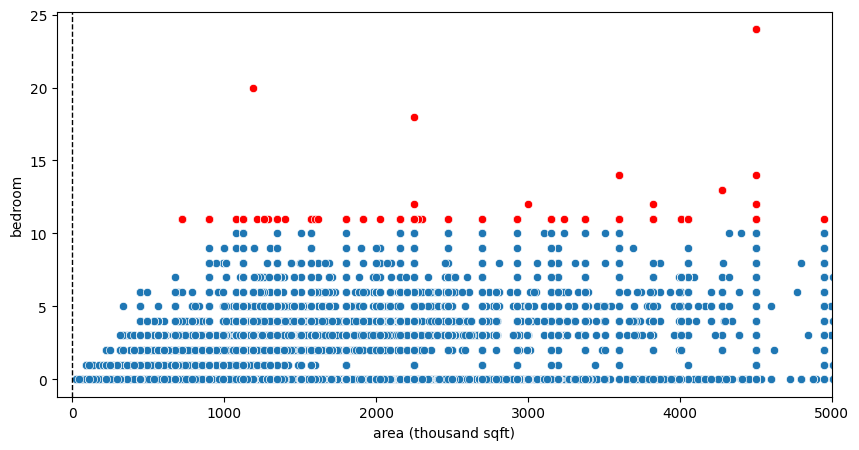

In [120]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['area(sqft)'] , y=df['bedroom'])
sns.scatterplot(x=bedroom_outlier['area(sqft)'] , y=bedroom_outlier['bedroom'], color='red')
plt.xlabel('area (thousand sqft)')
plt.ylabel('bedroom')
plt.xlim(-100, 5000)  # Adjust as needed to zoom in near zero
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at x=0
plt.show()

In [121]:
df.shape

(42204, 12)

### 4. Bath

In [122]:
bath_outlier=IQR('bath')
print(f"total no of rows in bath are {len(df['bath'])}")
print(f"total no of outlier in bath are {bath_outlier.value_counts().sum()}")

total no of rows in bath are 42204
total no of outlier in bath are 0


`No outlier detected but still we will checkout, could be there data anomalies`

In [123]:
df[(df['type']=='House') & (df['area(sqft)']<4500) & (df['area(sqft)']>=2250) & (df['bedroom']>5) & (df['bath']>6)]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
56     House  For Sale      2452.5      7.0   7.0        800.00   
158    House  For Sale      2700.0      8.0   7.0        480.00   
224    House  For Sale      3150.0      8.0   7.0        490.00   
418    House  For Sale      2448.0      6.0   7.0        290.00   
525    House  For Sale      4320.0     10.0   7.0       1800.00   
...      ...       ...         ...      ...   ...           ...   
46990  House  For Rent      2250.0      7.0   7.0          1.00   
47033  House  For Rent      2700.0      7.0   8.0          0.20   
47110  House  For Rent      2250.0      6.0   7.0          0.27   
47317  House  For Rent      2520.0      7.0   7.0          0.25   
47546  House  For Rent      2250.0     10.0  10.0         18.00   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
56                       0.0                         0.0   
158                      0.0                         0.0   
224                      0.0                         0.0   
418                      0.0                         0.0   
525                      0.0                         0.0   
...                      ...                         ...   
46990                    0.0                         0.0   
47033                    0.0                         0.0   
47110                    0.0                         0.0   
47317                    0.0                         0.0   
47546                    0.0                         0.0   

       remaining_installments  \
56                          0   
158                         0   
224                         0   
418                         0   
525                         0   
...                       ...   
46990                       0   
47033                       0   
47110                       0   
47317                       0   
47546                       0   

                                                location location_city  \
56                                                  E-11     Islamabad   
158                                                 G-15     Islamabad   
224                                                 G-15     Islamabad   
418                                  Bahria Town Karachi       Karachi   
525                                 Gulshan-e-Iqbal Town       Karachi   
...                                                  ...           ...   
46990                                       Sialkot Road    Gujranwala   
47033  Sindh University Employees Cooperative Housing...      Jamshoro   
47110                                    Jauharabad Road       Khushab   
47317                                       Sakrand Road     Nawabshah   
47546                                              Kalam          Swat   

        location_province  
56      Islamabad Capital  
158     Islamabad Capital  
224     Islamabad Capital  
418                 Sindh  
525                 Sindh  
...                   ...  
46990              Punjab  
47033               Sindh  
47110              Punjab  
47317               Sindh  
47546  Khyber Pakhtunkhwa  

[144 rows x 12 columns]

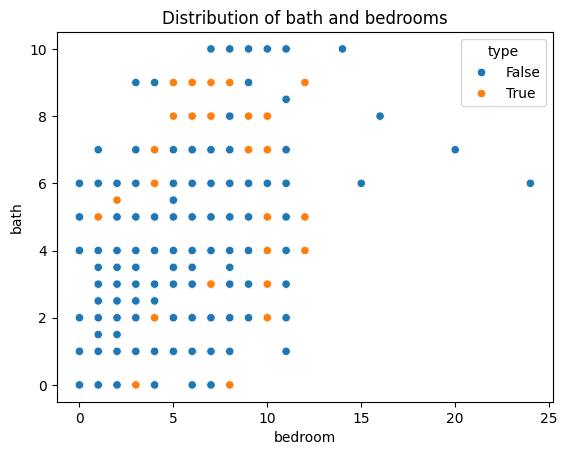

In [124]:
sns.scatterplot(x=df['bedroom'], y=df['bath'], hue=df['type']=='House', data=df)
plt.title('Distribution of bath and bedrooms')
plt.show()

In [125]:
df[(df['bedroom']>1) & (df['bath']==0)]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
529        Flat  For Sale      3717.0      3.0   0.0       1301.00   
2236       Flat  For Sale      2943.0      2.0   0.0       1031.00   
3950       Flat  For Sale      5814.0      4.0   0.0       2327.00   
6091      House  For Sale      3307.5      8.0   0.0        600.00   
8345      House  For Sale      1179.0      3.0   0.0         70.00   
30069  Building  For Sale       495.0      4.0   0.0       1000.00   
34651  Building  For Sale      1372.5      7.0   0.0        600.00   
34672  Building  For Sale       495.0      4.0   0.0        400.00   
36080  Building  For Sale       495.0      4.0   0.0        500.00   
36718  Building  For Sale      1372.5      7.0   0.0        130.00   
38085  Building  For Sale      1372.5      7.0   0.0        550.00   
38307  Building  For Sale      1372.5      7.0   0.0         81.50   
38342  Building  For Sale       495.0      2.0   0.0         32.00   
38466  Building  For Sale       495.0      4.0   0.0         70.00   
39614  Building  For Sale       495.0      6.0   0.0        115.00   
49739   Factory  For Rent      3150.0      2.0   0.0          1.00   
50257  Building  For Rent       495.0      4.0   0.0          2.25   
50498  Building  For Rent       495.0      4.0   0.0          1.00   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
529                      0.0                         0.0   
2236                     0.0                         0.0   
3950                     0.0                         0.0   
6091                     0.0                         0.0   
8345                     0.0                         0.0   
30069                    0.0                         0.0   
34651                    0.0                         0.0   
34672                    0.0                         0.0   
36080                    0.0                         0.0   
36718                    0.0                         0.0   
38085                    0.0                         0.0   
38307                    0.0                         0.0   
38342                    0.0                         0.0   
38466                    0.0                         0.0   
39614                    0.0                         0.0   
49739                    0.0                         0.0   
50257                    0.0                         0.0   
50498                    0.0                         0.0   

       remaining_installments                   location   location_city  \
529                         0                DHA Defence         Karachi   
2236                        0                DHA Defence         Karachi   
3950                        0                DHA Defence         Karachi   
6091                        0     Bahria Town Rawalpindi      Rawalpindi   
8345                        0                 Shahdadpur      Shahdadpur   
30069                       0                        F-7       Islamabad   
34651                       0                     Ayubia          Galyat   
34672                       0  Canal View Housing Scheme      Gujranwala   
36080                       0                 Raja Bazar      Rawalpindi   
36718                       0          Dargah Bazar Road       Pakpattan   
38085                       0       Gulistan Colony No 1      Faisalabad   
38307                       0                     Others          Layyah   
38342                       0             Haji Baba Road         Mingora   
38466                       0             Pindi Bhattian  Pindi Bhattian   
39614                       0    Airport Housing Society      Rawalpindi   
49739                       0                  Peco Road          Lahore   
50257                       0                 Canal Road      Faisalabad   
50498                       0         Muzzaffarabad City    Muzaffarabad   

        location_province  
529                 Sindh  
2236                Sindh  
3950      

`There are just 18 rows that have more than 1 bedrooms but 0 bath, so we will remove them`

In [126]:
df=df[~((df['bedroom']>1) & (df['bath']==0))]

In [127]:
df[(df['bath']==10) & (df['area(sqft)']<4500) & (df['type']=='House')]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
10251  House  For Sale      2250.0      8.0  10.0         190.0   
42308  House  For Rent      2700.0     10.0  10.0           1.5   
45722  House  For Rent      3510.0     10.0  10.0           1.5   
47546  House  For Rent      2250.0     10.0  10.0          18.0   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
10251                    0.0                         0.0   
42308                    0.0                         0.0   
45722                    0.0                         0.0   
47546                    0.0                         0.0   

       remaining_installments      location   location_city  \
10251                       0    Canal Road  Toba Tek Singh   
42308                       0  Shahbaz Town          Quetta   
45722                       0  Shahbaz Town          Quetta   
47546                       0         Kalam            Swat   

        location_province  
10251              Punjab  
42308         Balochistan  
45722         Balochistan  
47546  Khyber Pakhtunkhwa

`all these seems as clear data anomaly this is not possible to have such a huge amount of bedrooms and bath in such a low area for a house`

In [128]:
df.shape

(42186, 12)

In [129]:
df = df[~((df['bath']==10) & (df['area(sqft)']<4500) & (df['type']=='House'))]

In [130]:
df[(df['bath']>6) & (df['bath']>6) & (df['area(sqft)']<1300) & (df['type']=='House')]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
562    House  For Sale      1080.0      9.0   7.0        475.00   
3652   House  For Sale      1260.0      7.0   7.0        700.00   
4098   House  For Sale      1125.0      5.0   7.0        190.00   
9252   House  For Sale      1197.0      9.0   9.0         60.00   
9742   House  For Sale      1125.0      8.0   7.0        275.00   
9907   House  For Sale      1125.0      8.0   7.0        280.00   
10351  House  For Sale      1251.0      6.0   7.0        300.00   
12356  House  For Sale      1125.0      6.0   7.0        250.00   
13169  House  For Sale      1125.0      6.0   7.0        200.00   
13206  House  For Sale      1125.0      8.0   7.0        295.00   
13521  House  For Sale       945.0      8.0   8.0        170.00   
42299  House  For Rent      1125.0      8.0   7.0          1.10   
45641  House  For Rent       900.0      7.0   7.0          0.65   
45850  House  For Rent      1260.0      5.0   7.0          0.45   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
562                      0.0                         0.0   
3652                     0.0                         0.0   
4098                     0.0                         0.0   
9252                     0.0                         0.0   
9742                     0.0                         0.0   
9907                     0.0                         0.0   
10351                    0.0                         0.0   
12356                    0.0                         0.0   
13169                    0.0                         0.0   
13206                  150.0                       145.0   
13521                    0.0                         0.0   
42299                    0.0                         0.0   
45641                    0.0                         0.0   
45850                    0.0                         0.0   

       remaining_installments          location location_city  \
562                         0    Federal B Area       Karachi   
3652                        0              D-12     Islamabad   
4098                        0  Nasheman-e-Iqbal        Lahore   
9252                        0        Nango Line         Kotri   
9742                        0   Regi Model Town      Peshawar   
9907                        0     Old Bara Road      Peshawar   
10351                       0    Mirpur Mathelo        Ghotki   
12356                       0       Civil Lines    Gujranwala   
13169                       0            Others        Neelum   
13206                       1   Regi Model Town      Peshawar   
13521                       0   Lailabad Colony       Sakrand   
42299                       0         Hayatabad      Peshawar   
45641                       0       Warsak Road      Peshawar   
45850                       0      Faisal Hills        Taxila   

        location_province  
562                 Sindh  
3652    Islamabad Capital  
4098               Punjab  
9252                Sindh  
9742   Khyber Pakhtunkhwa  
9907   Khyber Pakhtunkhwa  
10351               Sindh  
12356              Punjab  
13169        Azad Kashmir  
13206  Khyber Pakhtunkhwa  
13521               Sindh  
42299  Khyber Pakhtunkhwa  
45641  Khyber Pakhtunkhwa  
45850              Punjab

`all these seems as clear data anomaly as it is very higly unlikely that we have such a huge bed and bath in very dense palce even the house is double story!`

In [131]:
df.shape

(42182, 12)

In [132]:
df[~((df['bath']>6) & (df['bath']>6) & (df['area(sqft)']<1300) & (df['type']=='House'))]

type   purpose  area(sqft)  bedroom  bath  price(Lakhs)  \
0         House  For Sale      4500.0      7.0   6.0       1900.00   
1         House  For Sale      3195.0      6.0   6.0        600.00   
2         House  For Sale      4500.0      8.0   7.0        700.00   
3         House  For Sale      1800.0      4.0   6.0        265.00   
4          Flat  For Sale       540.0      1.0   1.0         40.00   
...         ...       ...         ...      ...   ...           ...   
53248      Shop  For Rent      1125.0      0.0   0.0          1.35   
53249  Building  For Rent      1350.0      7.0   6.0          0.40   
53250      Shop  For Rent       450.0      0.0   0.0          0.65   
53253      Shop  For Rent      2497.5      0.0   0.0          1.50   
53254      Shop  For Rent      2250.0      0.0   0.0          2.00   

       initial_amount(Lakhs)  monthly_installment(Lakhs)  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        4.0                         3.0   
...                      ...                         ...   
53248                    0.0                         0.0   
53249                    0.0                         0.0   
53250                    0.0                         0.0   
53253                    0.0                         0.0   
53254                    0.0                         0.0   

       remaining_installments                       location location_city  \
0                           0                    DHA Defence     Islamabad   
1                           0                           G-15     Islamabad   
2                           0                           G-16     Islamabad   
3                           0                           B-17     Islamabad   
4                          12  Islamabad - Murree Expressway     Islamabad   
...                       ...                            ...           ...   
53248                       0                   Sialkot Road     Wazirabad   
53249                       0                   Sialkot Road     Wazirabad   
53250                       0               Wazirabad Bypass     Wazirabad   
53253                       0               Wazirabad Bypass     Wazirabad   
53254                       0            Bharoke Cheema Road     Wazirabad   

       location_province  
0      Islamabad Capital  
1      Islamabad Capital  
2      Islamabad Capital  
3      Islamabad Capital  
4      Islamabad Capital  
...                  ...  
53248             Punjab  
53249             Punjab  
53250             Punjab  
53253             Punjab  
53254             Punjab  

[42168 rows x 12 columns]

In [133]:
df = df[~((df['bath']>6) & (df['bath']>6) & (df['area(sqft)']<1300) & (df['type']=='House'))]

In [134]:
df.shape

(42168, 12)

### 5. initial_amount

In [135]:
initial_amount_outlier=IQR('initial_amount(Lakhs)')
print(f"total no of rows in initial_amount(Lakhs) are {len(df['initial_amount(Lakhs)'])}")
print(f"total no of outlier in initial_amount(Lakhs) are {initial_amount_outlier.value_counts().sum()}")

total no of rows in initial_amount(Lakhs) are 42168
total no of outlier in initial_amount(Lakhs) are 678


In [136]:
df[df['initial_amount(Lakhs)']>0].value_counts().sum()

678

`As we have seen all the non-zero values are detected as outlier, this is because there are just thase values or rows that have installments otherwise 0. As 0 is in majority that's why these are detected as outlier, but in actual these are not`

### 6. monthly_installment(Lakhs)

In [137]:
monthly_installment_outlier=IQR('monthly_installment(Lakhs)')
print(f"total no of rows in monthly_installment(Lakhs) are {len(df['monthly_installment(Lakhs)'])}")
print(f"total no of outlier in monthly_installment(Lakhs) are {monthly_installment_outlier.value_counts().sum()}")

total no of rows in monthly_installment(Lakhs) are 42168
total no of outlier in monthly_installment(Lakhs) are 675


In [138]:
df[df['monthly_installment(Lakhs)']>0].value_counts().sum()

675

`This is also same as intial_installment`

### 7. remaining_installments

In [139]:
remaining_installments_outlier=IQR('remaining_installments')
print(f"total no of rows in remaining_installments are {len(df['remaining_installments'])}")
print(f"total no of outlier in remaining_installments are {remaining_installments_outlier.value_counts().sum()}")

total no of rows in remaining_installments are 42168
total no of outlier in remaining_installments are 678


`This is also same as above two`

## Univariate analysis

**Question we answer!**
- What is the distribution of numeric columns?
- Is there any outlier appeared in boxplot?
- What is the most occuring type?
- What is the most and least selling property?
- Which province has more sales?
- Which locatin city has more sales in each province?
- Which location has more sales in most occuring location city?

### What is the distribution of numeric columns

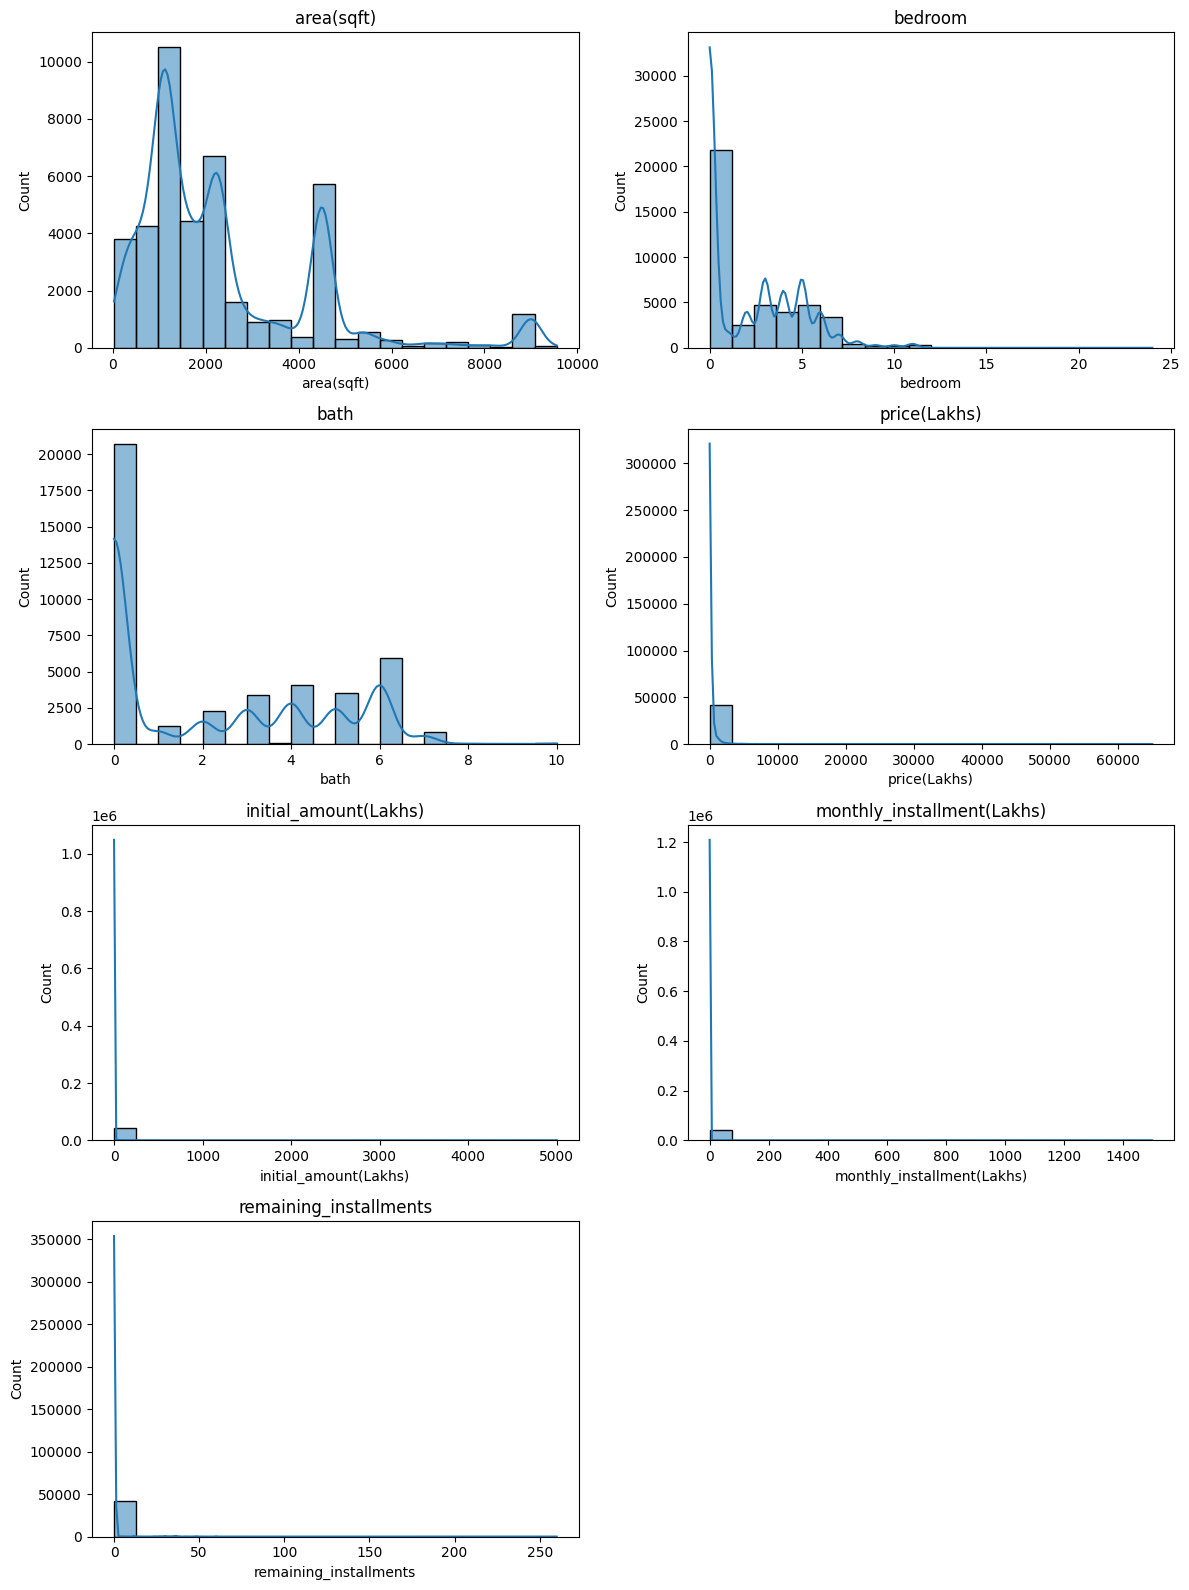

In [140]:
# check distribution of each numeric column
numeric_columns = df.select_dtypes(include='number').columns
n = len(numeric_columns)
ncols = 2
nrows =int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier detection using boxplot

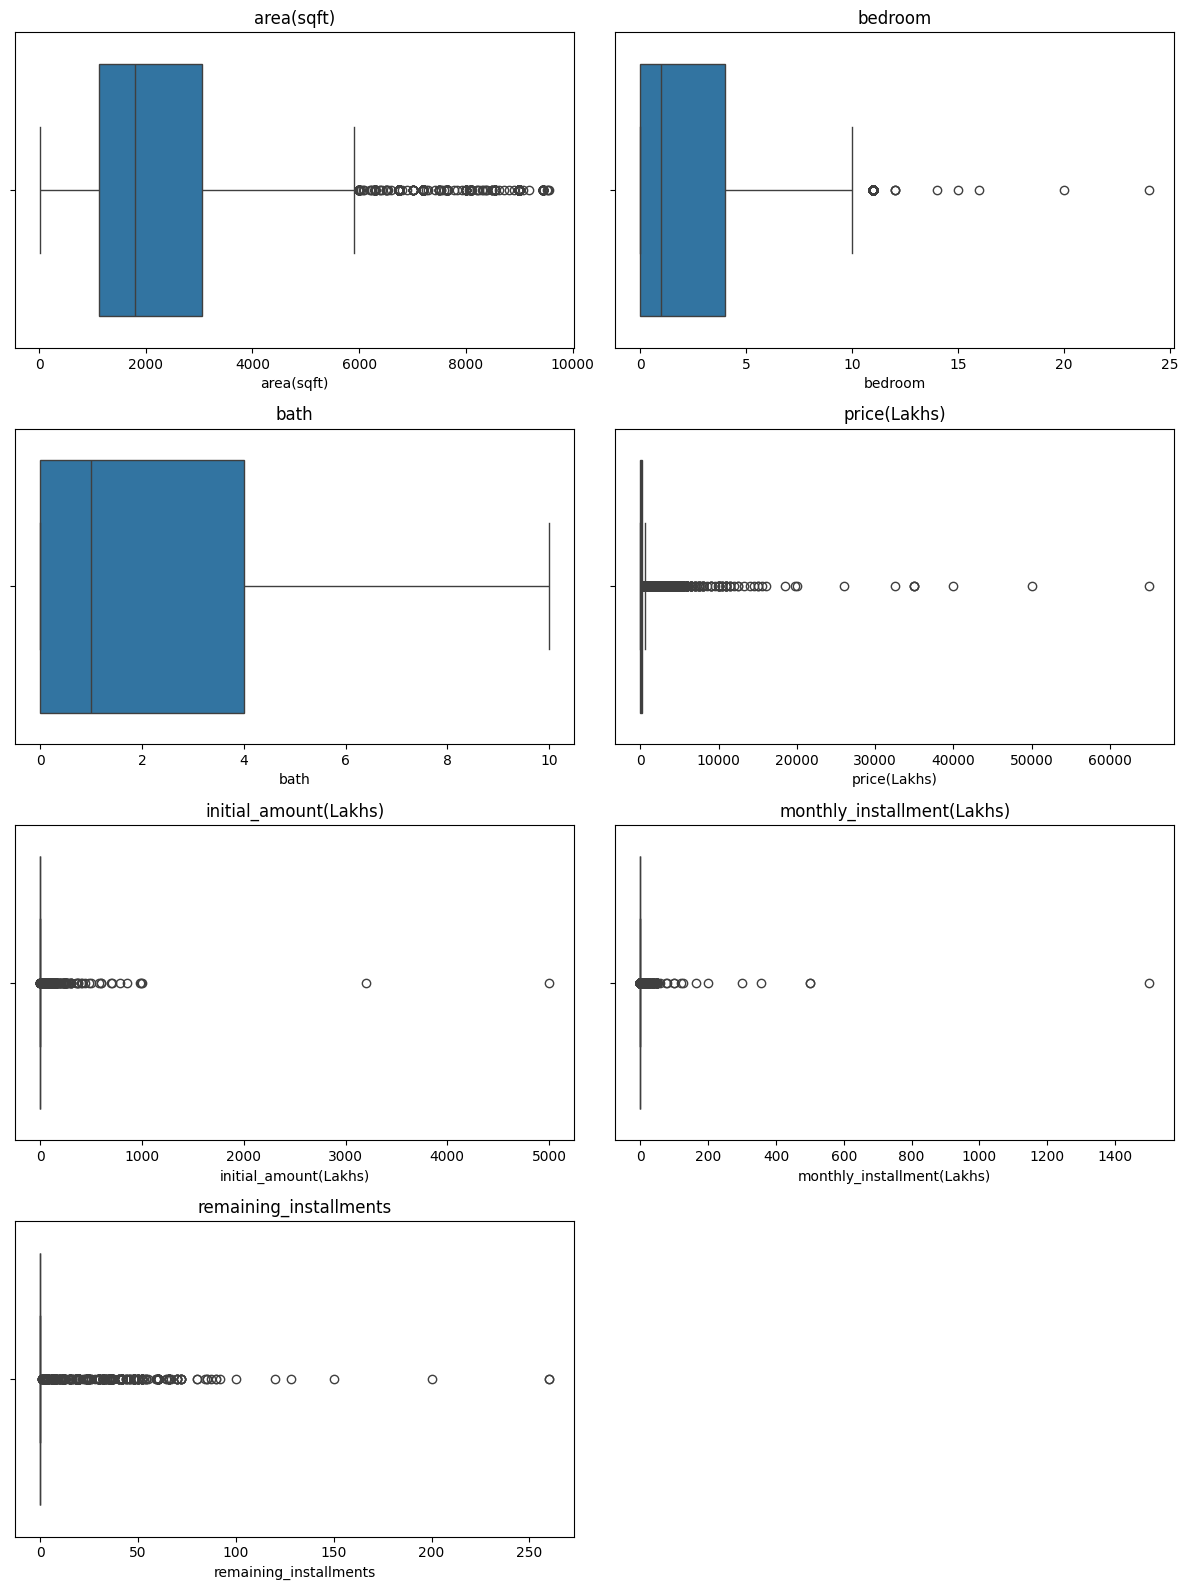

In [141]:
# spot outler using boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### What is the most occuring type?
### What is the most and least occuring property?

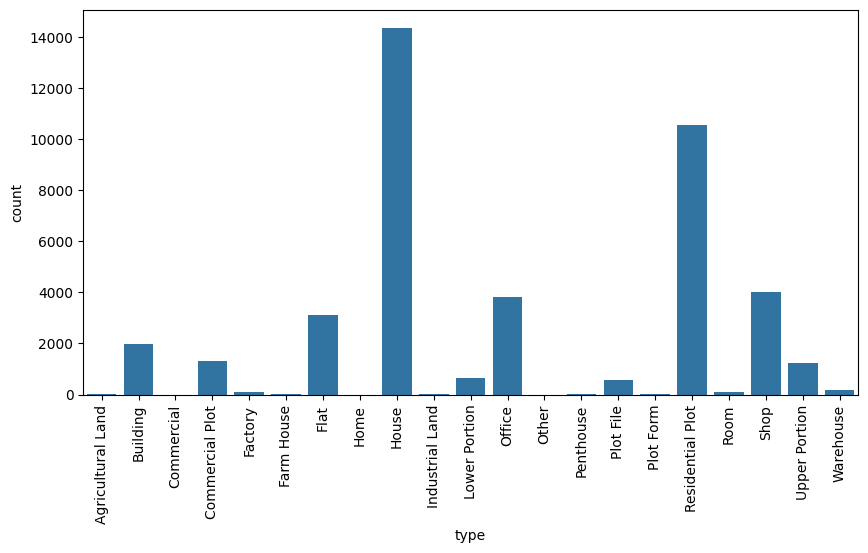

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['type'])
plt.xticks(rotation='vertical')
plt.show()

### Which provice has more sales?

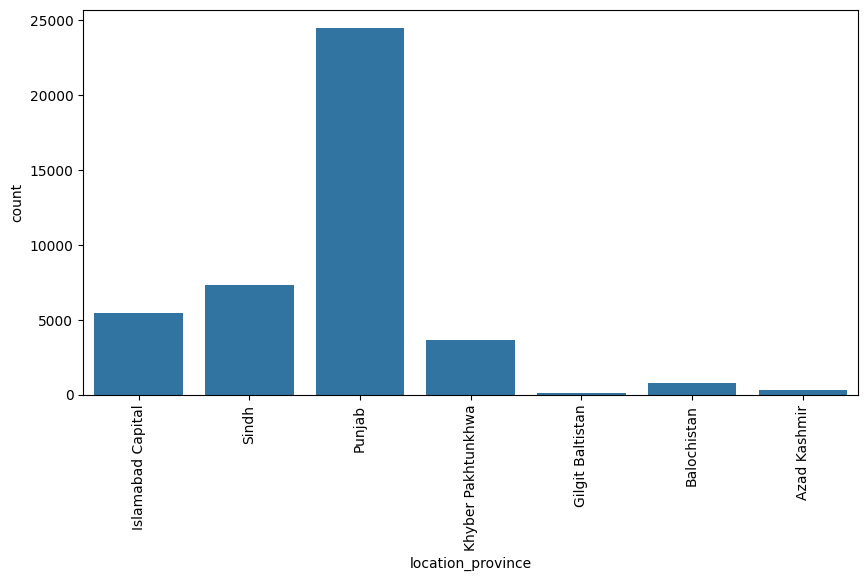

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['location_province'])
plt.xticks(rotation='vertical')
plt.show()

### which location city has more sales in each province?

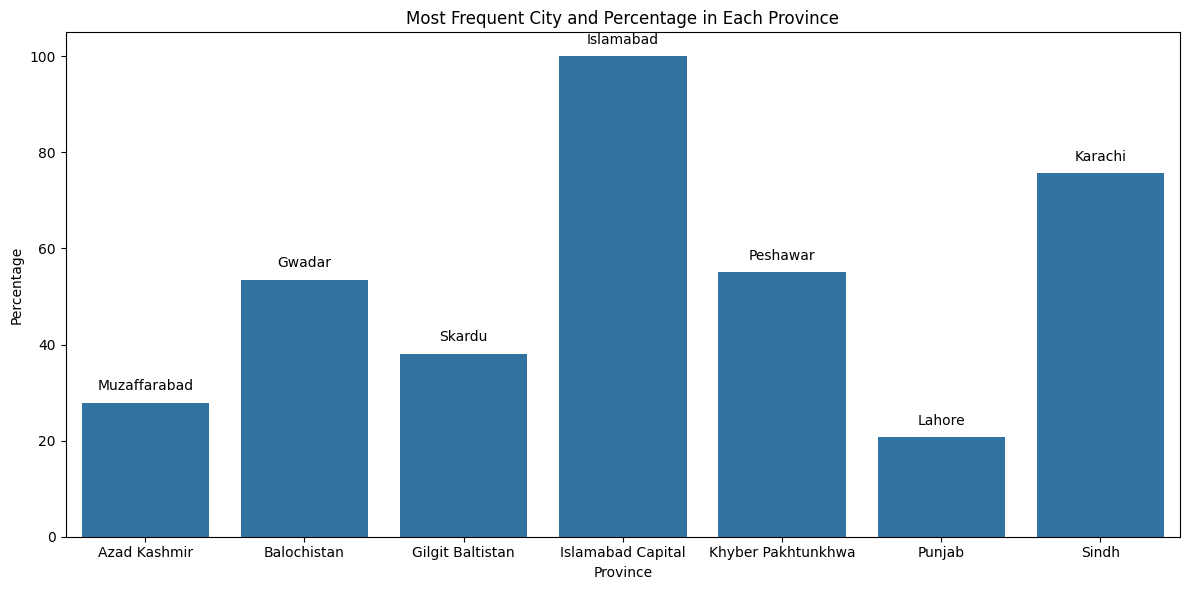

In [144]:
frequant_cityIn_province = df.groupby('location_province')['location_city'].agg(lambda x: x.value_counts().idxmax())
percentage_Infrequant_city = df.groupby('location_province')['location_city'].agg(lambda x: (x.value_counts(normalize=True).max()*100))


# Prepare data
province = frequant_cityIn_province.index
city = frequant_cityIn_province.values
percentage = percentage_Infrequant_city.values

plt.figure(figsize=(12,6))
bars = sns.barplot(x=province, y=percentage)

# Annotate each bar with the city name
for i, (bar, c) in enumerate(zip(bars.patches, city)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, c, 
             ha='center', va='bottom', fontsize=10, rotation=360)

plt.title('Most Frequent City and Percentage in Each Province')
plt.xlabel('Province')
plt.ylabel('Percentage')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

### what is most occuring locatoin in each city?

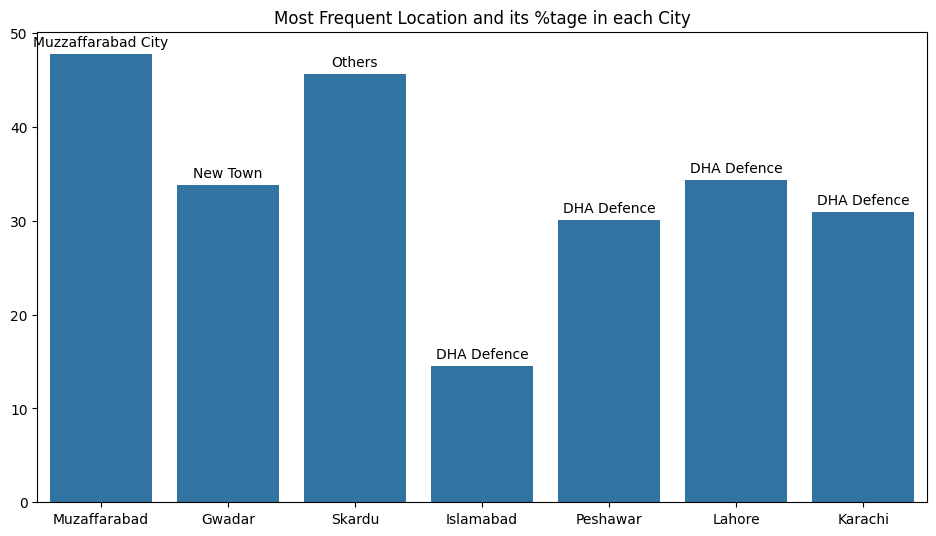

In [145]:
location_in_city={}
for city in frequant_cityIn_province:
    location = df.loc[(df['location_city']==city), 'location'].value_counts().idxmax()
    location_percentage = df.loc[(df['location_city']==city), 'location'].value_counts(normalize=True).max()*100
    location_in_city[city]=[location, location_percentage]


locations=[v[0] for v in location_in_city.values()]

plt.figure(figsize=(10,6))    
bars = sns.barplot(x=location_in_city.keys(), y=[v[1] for v in location_in_city.values()])


for i, (bar, l) in enumerate(zip(bars.patches, locations)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, l, 
             ha='center', va='top', fontsize=10, rotation=0,)

plt.title('Most Frequent Location and its %tage in each City')
plt.tight_layout(pad=3)
plt.show()

## Bivariate analysis

- What are the propeties that has more prices?
- feature reation with target variable
- find correlation

### What are the properties that has more prices

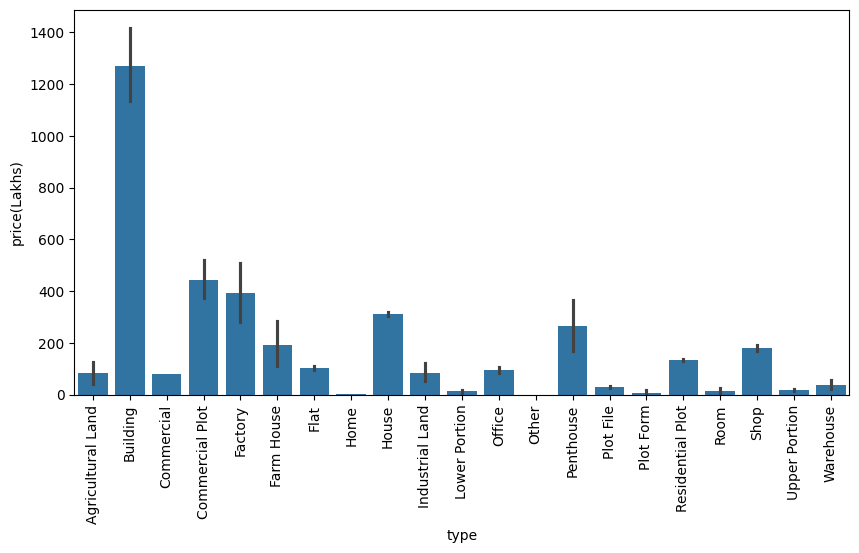

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['type'], y=df['price(Lakhs)'])
plt.xticks(rotation=90)
plt.show()

### feature relation with target variable

*price vs province*

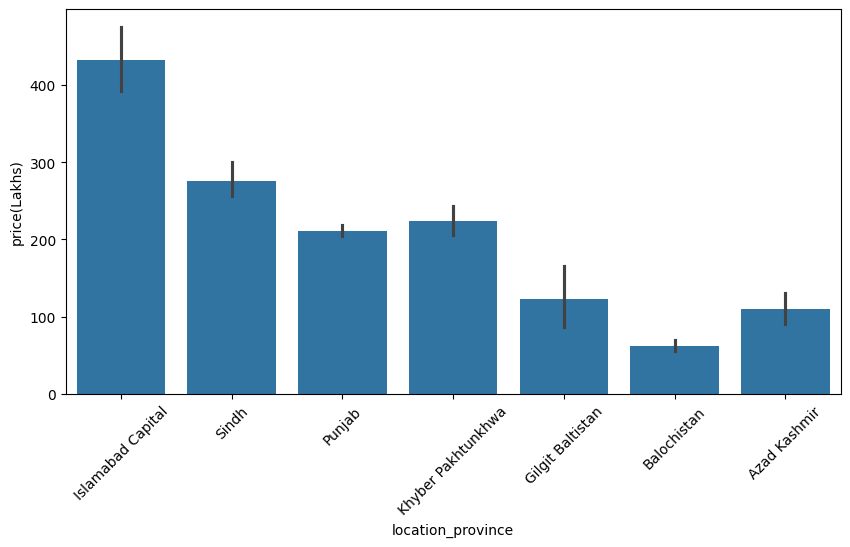

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['location_province'], y=df['price(Lakhs)'])
plt.xticks(rotation=45)
plt.show()

*price vs area*

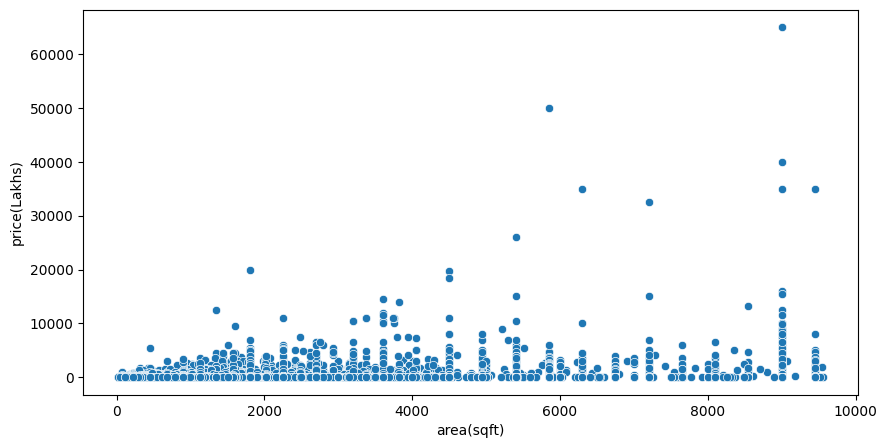

In [148]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['area(sqft)'], y=df['price(Lakhs)'])
plt.show()

*price vs bedroom*

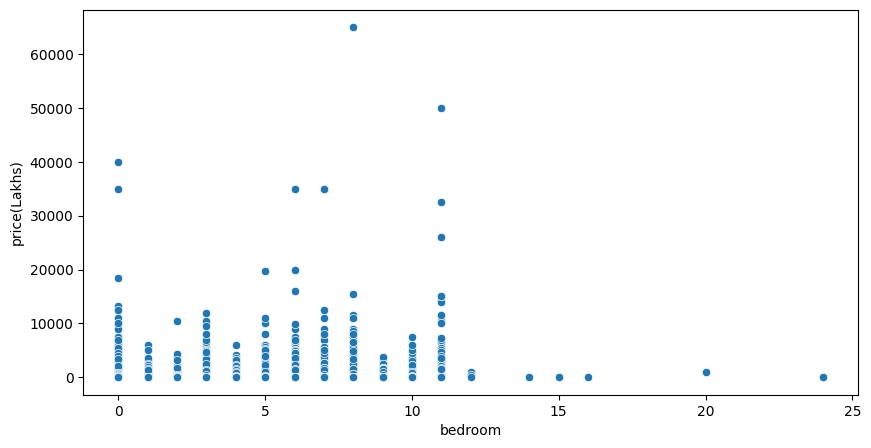

In [149]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['bedroom'], y=df['price(Lakhs)'])
plt.show()

*price vs bath*

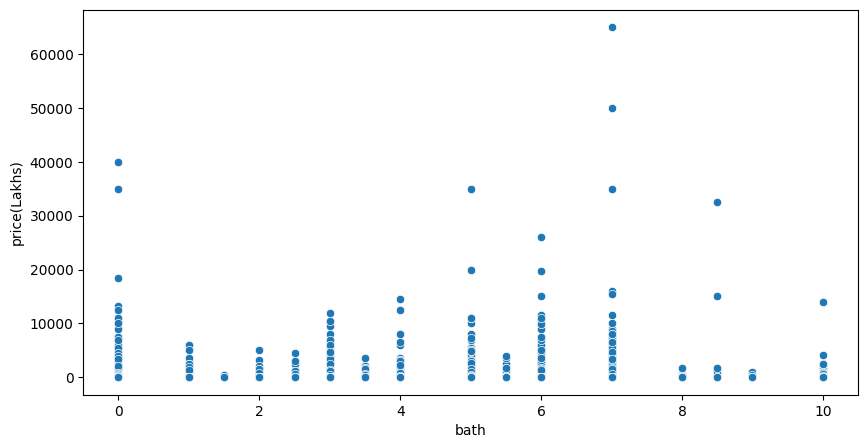

In [150]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['bath'], y=df['price(Lakhs)'])
plt.show()

*bath vs bedroom*

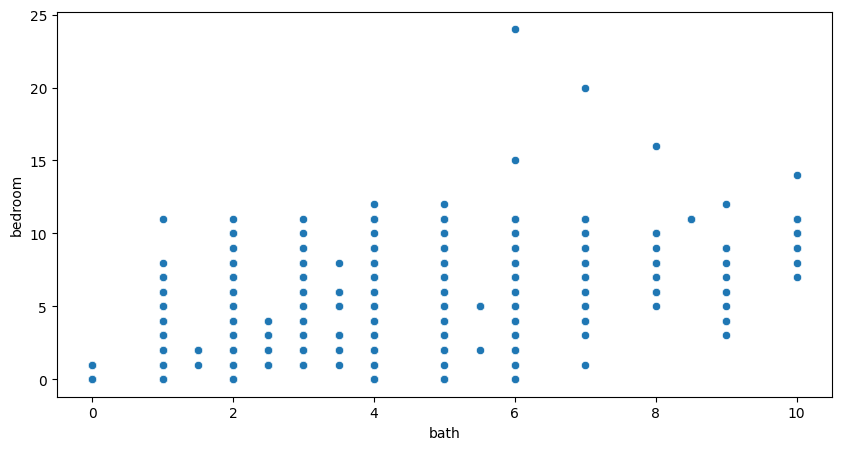

In [151]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['bath'], y=df['bedroom'])
plt.show()

*bedroom vs area*

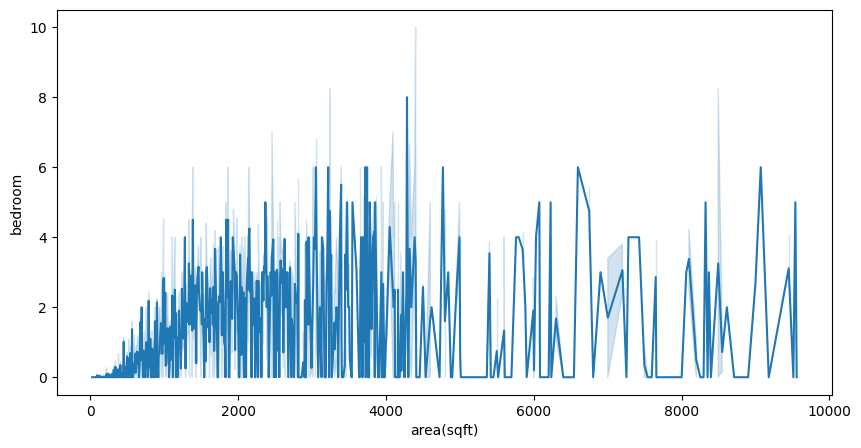

In [152]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['area(sqft)'], y=df['bedroom'])
plt.show()

### correlation

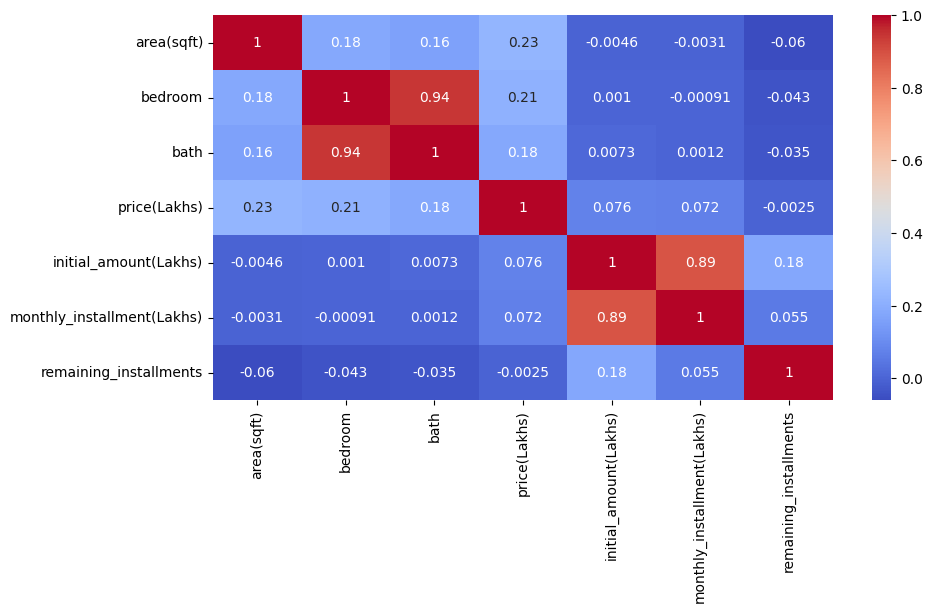

In [153]:
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.show()

## Feature Generation

In [154]:
df_copy=df.copy()

In [155]:
df_copy.columns

Index(['type', 'purpose', 'area(sqft)', 'bedroom', 'bath', 'price(Lakhs)',
       'initial_amount(Lakhs)', 'monthly_installment(Lakhs)',
       'remaining_installments', 'location', 'location_city',
       'location_province'],
      dtype='object')

In [156]:
df_copy['area_x_bedroom'] = df_copy['area(sqft)'] * df_copy['bedroom']
df_copy['bed_bath_ratio'] = df_copy['bedroom'] / (df_copy['bath'] + 1)
df_copy['price_per_sqft'] = df_copy['price(Lakhs)'] / (df_copy['area(sqft)']+1)
df_copy['total_payments'] = df_copy['initial_amount(Lakhs)'] + (df_copy['monthly_installment(Lakhs)'] * df_copy['remaining_installments'])

In [157]:
df.shape

(42168, 12)

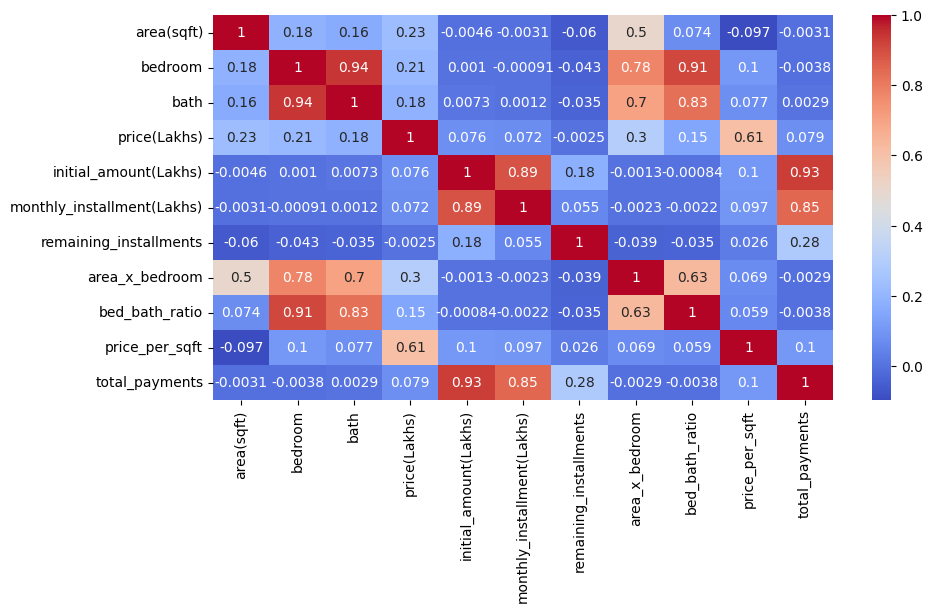

In [158]:
corr=df_copy.select_dtypes(include='number').corr()
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.show()

In [159]:
df.columns

Index(['type', 'purpose', 'area(sqft)', 'bedroom', 'bath', 'price(Lakhs)',
       'initial_amount(Lakhs)', 'monthly_installment(Lakhs)',
       'remaining_installments', 'location', 'location_city',
       'location_province'],
      dtype='object')

## Feature normalizaiton and scaling

### Normalize the distribution of features

In [160]:
numeric_columns=[col for col in df.select_dtypes(include='number').columns if col != 'price(Lakhs)']

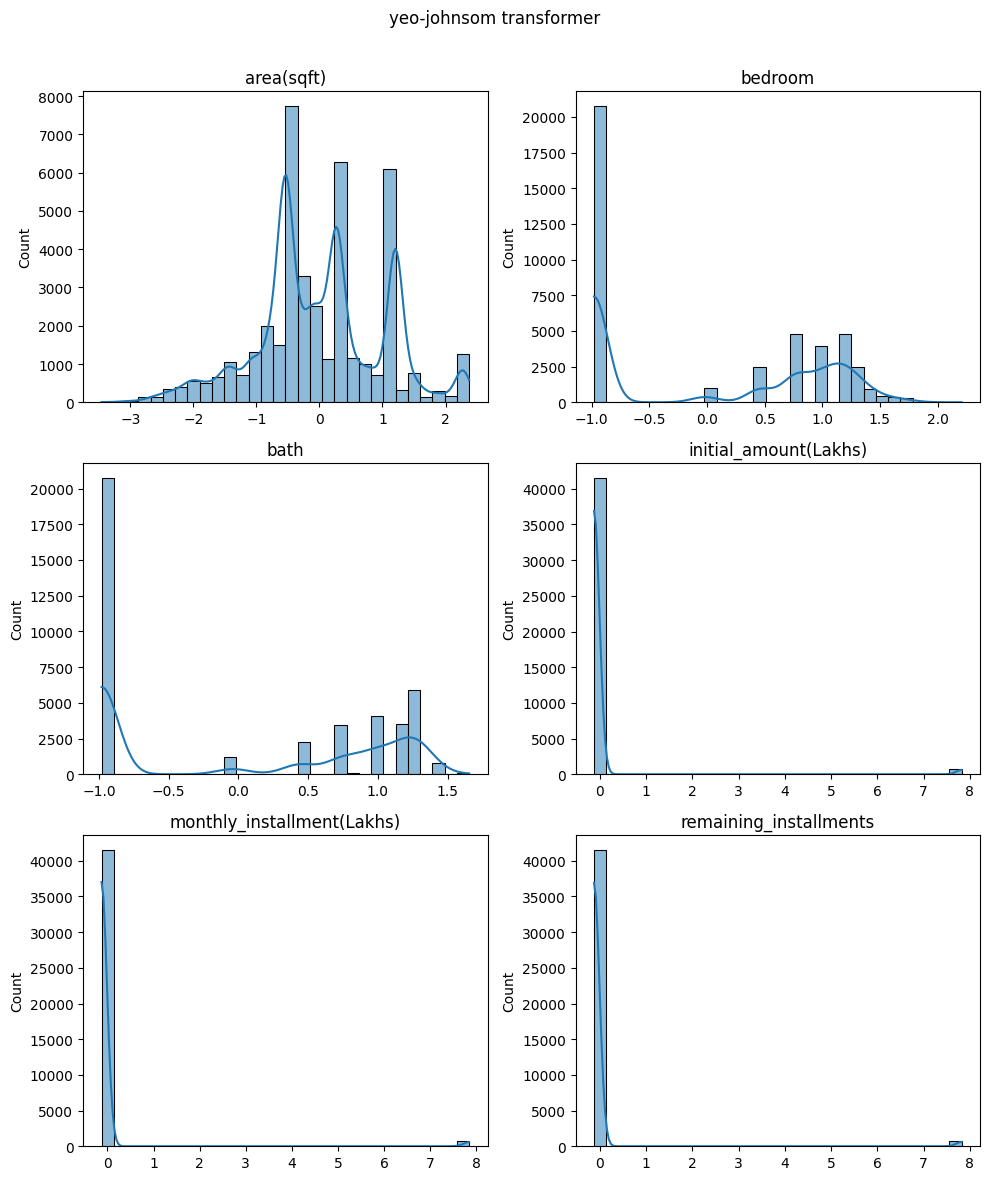

In [161]:
numeric_columns = [
    col for col in df.select_dtypes(include='number').columns
    if col != 'price(Lakhs)' and 'yeo' not in col
]
nrow=int(np.ceil(len(numeric_columns)/2))
fig, axes=plt.subplots( nrow, 2, figsize=(10, nrow*4))
axes=axes.flatten()

yeo=PowerTransformer(method='yeo-johnson')

for i, col in enumerate(numeric_columns):
    yeo_data=yeo.fit_transform(df[[col]])
    sns.histplot(x=yeo_data.flatten(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

fig.suptitle('yeo-johnsom transformer')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


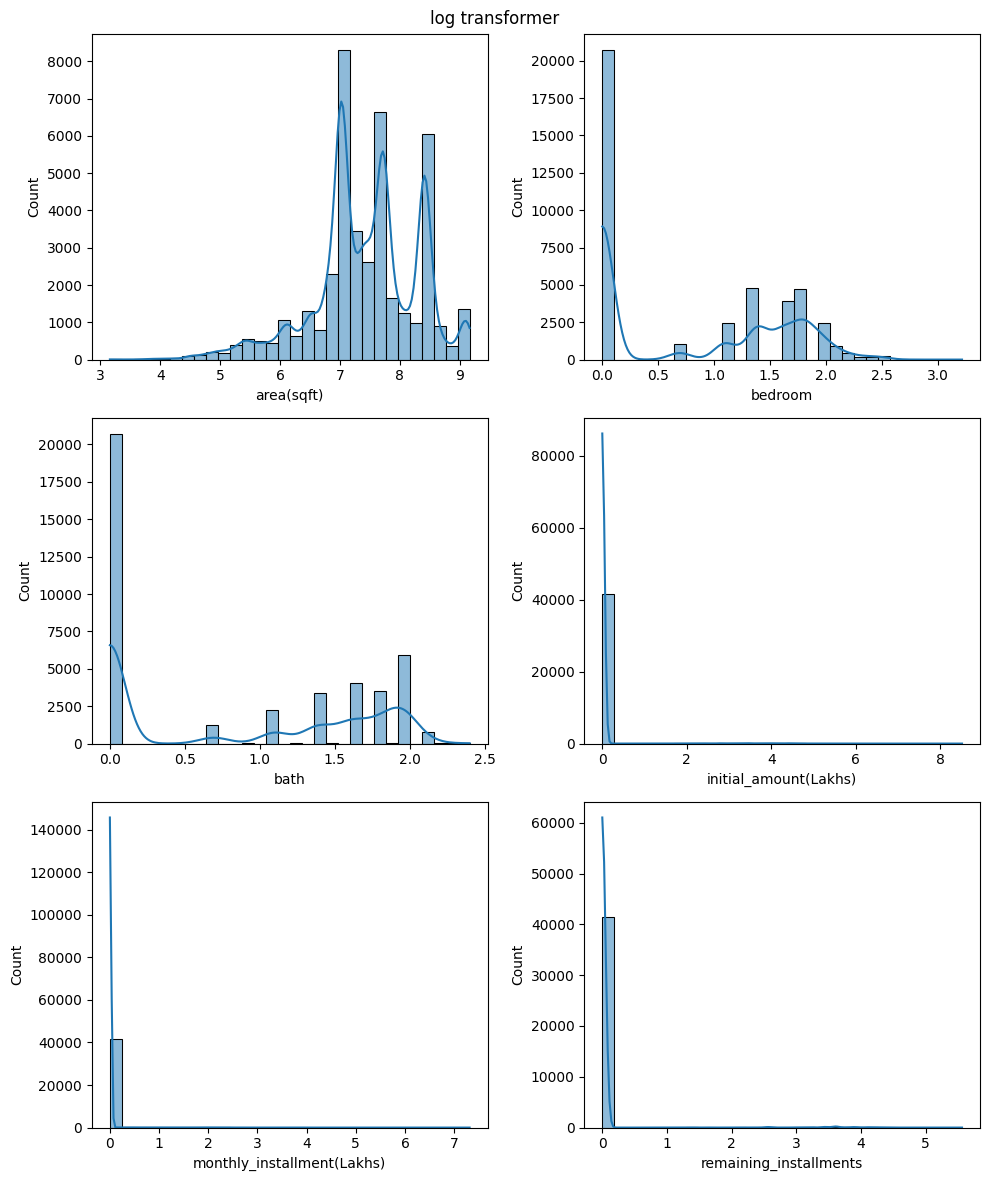

In [162]:
numeric_columns = [
    col for col in df.select_dtypes(include='number').columns
    if col != 'price(Lakhs)' and 'yeo' not in col
]
nrow=int(np.ceil(len(numeric_columns)/2))
fig, axes=plt.subplots( nrow, 2, figsize=(10, nrow*4))
axes=axes.flatten()

yeo=PowerTransformer(method='yeo-johnson')

for i, col in enumerate(numeric_columns):
    if 0 in df[col]:
        log=np.log1p(df[col])
    else:
        log=np.log(df[col])
    sns.histplot(x=log, kde=True, bins=30, ax=axes[i])

fig.suptitle('log transformer')
plt.tight_layout()
plt.show()

In [163]:
df_copy.columns

Index(['type', 'purpose', 'area(sqft)', 'bedroom', 'bath', 'price(Lakhs)',
       'initial_amount(Lakhs)', 'monthly_installment(Lakhs)',
       'remaining_installments', 'location', 'location_city',
       'location_province', 'area_x_bedroom', 'bed_bath_ratio',
       'price_per_sqft', 'total_payments'],
      dtype='object')

In [164]:
numeric_columns = [
    col for col in df_copy.select_dtypes(include='number').columns
    if col != 'price(Lakhs)' and f"{col}_yeo" not in df.columns
]
nrow=int(np.ceil(len(numeric_columns)/2))
fig, axes=plt.subplots( nrow, 2, figsize=(10, nrow*4))
axes=axes.flatten()

from sklearn.preprocessing import QuantileTransformer

# Create the transformer (output_distribution can be 'uniform' or 'normal')
qt = QuantileTransformer(output_distribution='normal', random_state=0)


for i, col in enumerate(numeric_columns):
    df_copy[col+'_qt']=qt.fit_transform(df_copy[[col]])
    sns.histplot(x=df_copy[col+'_qt'], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

fig.suptitle('quantile transformer')
plt.tight_layout()
plt.show()

In [165]:
numeric_columns = [
    col for col in df_copy.select_dtypes(include='number').columns
    if col != 'price(Lakhs)' and 'qt' not in col
]
df_copy.drop(columns=numeric_columns, inplace=True)


In [166]:
df_copy.columns

Index(['type', 'purpose', 'price(Lakhs)', 'location', 'location_city',
       'location_province', 'area(sqft)_qt', 'bedroom_qt', 'bath_qt',
       'initial_amount(Lakhs)_qt', 'monthly_installment(Lakhs)_qt',
       'remaining_installments_qt', 'area_x_bedroom_qt', 'bed_bath_ratio_qt',
       'price_per_sqft_qt', 'total_payments_qt'],
      dtype='object')

In [167]:
df_copy.drop(columns={'remaining_installments_qt'}, inplace=True)

## Feature Encoding

In [168]:
df_copy.columns

Index(['type', 'purpose', 'price(Lakhs)', 'location', 'location_city',
       'location_province', 'area(sqft)_qt', 'bedroom_qt', 'bath_qt',
       'initial_amount(Lakhs)_qt', 'monthly_installment(Lakhs)_qt',
       'area_x_bedroom_qt', 'bed_bath_ratio_qt', 'price_per_sqft_qt',
       'total_payments_qt'],
      dtype='object')

In [169]:
class FrequancyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_dic_={}
    
    def fit(self, X, y=None):
        X=pd.Series(np.squeeze(X))
        freq=X.value_counts(normalize=True)
        self.freq_dic_=freq.to_dict()
        return self
    
    def transform(self, X):
        X=pd.Series(np.squeeze(X))
        return X.map(self.freq_dic_).fillna(0).to_frame()

### initializing encoders

In [170]:
le=LabelEncoder()
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
fe=FrequancyEncoder()

### Frequancy encoding

In [171]:
# Apply frequency encoding
df_copy['location_freq'] = fe.fit_transform(df_copy['location'])
df_copy['location_city_freq'] = fe.fit_transform(df_copy['location_city'])

# Drop original columns after encoding
df_copy = df_copy.drop(['location', 'location_city'], axis=1)


### OHE encoding

In [172]:
# For 'type'
type_ohe = ohe.fit_transform(df_copy[['type']])
type_ohe_df_copy = pd.DataFrame(type_ohe, columns=ohe.get_feature_names_out(['type']), index=df_copy.index)
df_copy = pd.concat([df_copy, type_ohe_df_copy], axis=1)

# For 'location_province'
province_ohe = ohe.fit_transform(df_copy[['location_province']])
province_ohe_df_copy = pd.DataFrame(province_ohe, columns=ohe.get_feature_names_out(['location_province']), index=df_copy.index)
df_copy = pd.concat([df_copy, province_ohe_df_copy], axis=1)

# For 'purpose'
purpose_ohe = ohe.fit_transform(df_copy[['purpose']])
purpose_ohe_df_copy = pd.DataFrame(purpose_ohe, columns=ohe.get_feature_names_out(['purpose']), index=df_copy.index)
df_copy = pd.concat([df_copy, purpose_ohe_df_copy], axis=1)

# Drop original columns
df_copy = df_copy.drop(['type', 'location_province', 'purpose'], axis=1)

## Traing Models

### Train Test Split

In [173]:
X=df_copy.drop('price(Lakhs)', axis=1)
y=df_copy['price(Lakhs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### initializing models

In [174]:
lr=LinearRegression()
svr=SVR()
xgb=XGBRegressor()
lgb=LGBMRegressor()


### Fit models on train data

In [175]:
X_train.columns

Index(['area(sqft)_qt', 'bedroom_qt', 'bath_qt', 'initial_amount(Lakhs)_qt',
       'monthly_installment(Lakhs)_qt', 'area_x_bedroom_qt',
       'bed_bath_ratio_qt', 'price_per_sqft_qt', 'total_payments_qt',
       'location_freq', 'location_city_freq', 'type_Agricultural Land',
       'type_Building', 'type_Commercial', 'type_Commercial Plot',
       'type_Factory', 'type_Farm House', 'type_Flat', 'type_Home',
       'type_House', 'type_Industrial Land', 'type_Lower Portion',
       'type_Office', 'type_Penthouse', 'type_Plot File', 'type_Plot Form',
       'type_Residential Plot', 'type_Room', 'type_Shop', 'type_Upper Portion',
       'type_Warehouse', 'location_province_Azad Kashmir',
       'location_province_Balochistan', 'location_province_Gilgit Baltistan',
       'location_province_Islamabad Capital',
       'location_province_Khyber Pakhtunkhwa', 'location_province_Punjab',
       'location_province_Sindh', 'purpose_For Rent', 'purpose_For Sale'],
      dtype='object')

In [176]:
# lr.fit(X_train, y_train)
# svr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 33734, number of used features: 35
[LightGBM] [Info] Start training from score 246.637429


LGBMRegressor()

### Getting predinction

In [177]:
# lr_pred=lr.predict(X_test)
# svr_pred=svr.predict(X_test)
xgb_pred=xgb.predict(X_test)
lgb_pred=lgb.predict(X_test)

### Validation Metrixs

In [178]:
model_preds = {
    # "LinearRegression": lr_pred,
    # "SVR": svr_pred,
    "XGBRegressor": xgb_pred,
    "LGBMRegressor": lgb_pred
}
#
for name, preds in model_preds.items():
    print(f"--- {name} ---")
    print("R2 Score:", r2_score(y_test, preds))
    print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
    print("Mean Squared Error:", mean_squared_error(y_test, preds))
    print("Root Mean Squared Error:", mean_squared_error(y_test, preds, squared=False))
    print()

--- XGBRegressor ---
R2 Score: 0.8262632346258981
Mean Absolute Error: 19.38109415959537
Mean Squared Error: 187150.86654966476
Root Mean Squared Error: 432.6093694658783

--- LGBMRegressor ---
R2 Score: 0.7141842482828211
Mean Absolute Error: 25.044077846000018
Mean Squared Error: 307883.39757698437
Root Mean Squared Error: 554.8724155848661



c:\Users\hp\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hp\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


`lets create a pipeline and deploy our model`

## Pipeline Creation

In [179]:
pipeline_df=df.copy()

In [180]:
pipeline_df.columns

Index(['type', 'purpose', 'area(sqft)', 'bedroom', 'bath', 'price(Lakhs)',
       'initial_amount(Lakhs)', 'monthly_installment(Lakhs)',
       'remaining_installments', 'location', 'location_city',
       'location_province'],
      dtype='object')

In [182]:
pipe_X=pipeline_df.drop('price(Lakhs)', axis=1)
pipe_y=pipeline_df['price(Lakhs)']

pipe_X_train, pipe_X_test, pipe_y_train, pipe_y_test = train_test_split(pipe_X, pipe_y, test_size=0.2, random_state=42)

### Making Customer Imputers and Encoder

In [184]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoded_dec={}
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        
        for col in X.columns:
            freq=X[col].value_counts(normalize=True).to_dict()
            self.encoded_dec[col]=freq

        return self
    
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)

        for col in X.columns:
            if col in self.encoded_dec:
                X[col]=X[col].map(self.encoded_dec[col]).fillna(0)  
            else:
                raise ValueError(f"The {col} no exist in input features")
        return X


In [185]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, impute_type=True, impute_bed=True, impute_bath=True, impute_locations=True):
        self.impute_type = impute_type
        self.impute_bed = impute_bed
        self.impute_bath = impute_bath
        self.impute_locations = impute_locations

        self.type_mode_by_area = {}
        self.bed_medians = {}
        self.bath_medians = {}
        self.loc_modes = {}
        self.city_modes = {}
        self.province_modes = {}

    def fit(self, X, y=None):
        X = X.copy()
        
        if self.impute_type and 'type' in X.columns:
            self.type_mode_by_area = X.groupby('area(sqft)')['type'] \
                .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

        if self.impute_bed and 'bedroom' in X.columns:
            self.bed_medians = X.groupby(['area(sqft)', 'bath'])['bedroom'].median().to_dict()
        
        if self.impute_bath and 'bath' in X.columns:
            self.bath_medians = X.groupby(['area(sqft)', 'bedroom'])['bath'].median().to_dict()

        if self.impute_locations:
            if 'location' in X.columns:
                self.loc_modes = {}
                self.loc_modes.update({
                    ('city_prov', key): val.mode().iloc[0]
                    for key, val in X.groupby(['location_city', 'location_province'])['location']
                    if not val.mode().empty
                })
                self.loc_modes.update({
                    ('city', key): val.mode().iloc[0]
                    for key, val in X.groupby('location_city')['location']
                    if not val.mode().empty
                })
                self.loc_modes.update({
                    ('prov', key): val.mode().iloc[0]
                    for key, val in X.groupby('location_province')['location']
                    if not val.mode().empty
                })
            
            if 'location_city' in X.columns:
                self.city_modes = {}
                self.city_modes.update({
                    ('loc_prov', key): val.mode().iloc[0]
                    for key, val in X.groupby(['location', 'location_province'])['location_city']
                    if not val.mode().empty
                })
                self.city_modes.update({
                    ('loc', key): val.mode().iloc[0]
                    for key, val in X.groupby('location')['location_city']
                    if not val.mode().empty
                })
                self.city_modes.update({
                    ('prov', key): val.mode().iloc[0]
                    for key, val in X.groupby('location_province')['location_city']
                    if not val.mode().empty
                })
            
            if 'location_province' in X.columns:
                self.province_modes = {}
                self.province_modes.update({
                    ('loc_city', key): val.mode().iloc[0]
                    for key, val in X.groupby(['location', 'location_city'])['location_province']
                    if not val.mode().empty
                })
                self.province_modes.update({
                    ('city', key): val.mode().iloc[0]
                    for key, val in X.groupby('location_city')['location_province']
                    if not val.mode().empty
                })
                self.province_modes.update({
                    ('loc', key): val.mode().iloc[0]
                    for key, val in X.groupby('location')['location_province']
                    if not val.mode().empty
                })

        return self

    def transform(self, X):
        X = X.copy()

        if self.impute_type and 'type' in X.columns and X['type'].isnull().sum() > 0:
            X['type'] = X.apply(
                lambda row: self.type_mode_by_area.get(row['area(sqft)'], row['type'])
                if pd.isnull(row['type']) else row['type'], axis=1)

        if self.impute_bed and 'bedroom' in X.columns and X['bedroom'].isnull().sum() > 0:
            X['bedroom'] = X.apply(
                lambda row: self.bed_medians.get((row['area(sqft)'], row['bath']), row['bedroom'])
                if pd.isnull(row['bedroom']) else row['bedroom'], axis=1)

        if self.impute_bath and 'bath' in X.columns and X['bath'].isnull().sum() > 0:
            X['bath'] = X.apply(
                lambda row: self.bath_medians.get((row['area(sqft)'], row['bedroom']), row['bath'])
                if pd.isnull(row['bath']) else row['bath'], axis=1)

        if self.impute_locations:
            if 'location' in X.columns and X['location'].isnull().sum() > 0:
                X['location'] = X.apply(lambda row: self._impute_location(row, 'location'), axis=1)
            if 'location_city' in X.columns and X['location_city'].isnull().sum() > 0:
                X['location_city'] = X.apply(lambda row: self._impute_location(row, 'location_city'), axis=1)
            if 'location_province' in X.columns and X['location_province'].isnull().sum() > 0:
                X['location_province'] = X.apply(lambda row: self._impute_location(row, 'location_province'), axis=1)


        return X


    def _impute_location(self, row, col):
        if col == 'location' and pd.isnull(row['location']):
            return self.loc_modes.get(('city_prov', (row['location_city'], row['location_province'])),
                   self.loc_modes.get(('city', row['location_city']),
                   self.loc_modes.get(('prov', row['location_province']), row['location'])))
        
        if col == 'location_city' and pd.isnull(row['location_city']):
            return self.city_modes.get(('loc_prov', (row['location'], row['location_province'])),
                   self.city_modes.get(('loc', row['location']),
                   self.city_modes.get(('prov', row['location_province']), row['location_city'])))
        
        if col == 'location_province' and pd.isnull(row['location_province']):
            return self.province_modes.get(('loc_city', (row['location'], row['location_city'])),
                   self.province_modes.get(('city', row['location_city']),
                   self.province_modes.get(('loc', row['location']), row['location_province'])))
        
        return row[col]


In [186]:
class CustomPaymentImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.monthly_group_medians = {}
        self.initial_group_medians = {}
        

    def fit(self, X, y=None):
        X = X.copy()
        
        # Round values for grouping
        X['initial_round'] = X['initial_amount(Lakhs)'].round(0)
        X['monthly_round'] = X['monthly_installment(Lakhs)'].round(0)
        
        # Store medians as dictionaries
        self.monthly_group_medians = (
            X.groupby('initial_round')['monthly_installment(Lakhs)']
            .median().to_dict()
        )
        self.initial_group_medians = (
            X.groupby('monthly_round')['initial_amount(Lakhs)']
            .median().to_dict()
        )
        return self

    def transform(self, X):
        X = X.copy()
        X['initial_round'] = X['initial_amount(Lakhs)'].round(0)
        X['monthly_round'] = X['monthly_installment(Lakhs)'].round(0)
        
        # Impute monthly_installment
        mask = X['monthly_installment(Lakhs)'].isna()
        X.loc[mask, 'monthly_installment(Lakhs)'] = (
            X.loc[mask, 'initial_round'].map(self.monthly_group_medians)
        )
        
        # Impute initial_amount
        mask = X['initial_amount(Lakhs)'].isna()
        X.loc[mask, 'initial_amount(Lakhs)'] = (
            X.loc[mask, 'monthly_round'].map(self.initial_group_medians)
        )
        # Drop helper cols
        return X.drop(columns=['initial_round', 'monthly_round'])


In [187]:
class FeatureGeneration(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Create existing features
        X['area_x_bedroom'] = X['area(sqft)'] * X['bedroom']
        X['bed_bath_ratio'] = X['bedroom'] / (X['bath'] + 1)
        X['total_payments'] = X['initial_amount(Lakhs)'] + (X['monthly_installment(Lakhs)'] * X['remaining_installments'])
        
        X.drop(columns=['remaining_installments'], inplace=True, errors='ignore')
        return X

In [188]:
pipe_X.columns

Index(['type', 'purpose', 'area(sqft)', 'bedroom', 'bath',
       'initial_amount(Lakhs)', 'monthly_installment(Lakhs)',
       'remaining_installments', 'location', 'location_city',
       'location_province'],
      dtype='object')

In [191]:
pipeline = Pipeline([
    # Imputation
    ('feature_imputation', make_column_transformer(
        (CustomImputer(impute_type=True, impute_bed=True, impute_bath=True, impute_locations=True), 
         ['area(sqft)','type', 'bedroom', 'bath', 'location', 'location_city', 'location_province']),
        (CustomPaymentImputer(), ['initial_amount(Lakhs)', 'monthly_installment(Lakhs)']),
        remainder='passthrough',
        verbose_feature_names_out=False 
    )),

    # Generate new features
    ('feature_generation', FeatureGeneration()),

    # Option 1: Use separate columns for different transformations
    ('preprocessing', make_column_transformer(
        (FrequencyEncoder(), ['location', 'location_city']),
        (OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['type', 'purpose', 'location_province']),
        (RobustScaler(), ['initial_amount(Lakhs)', 'monthly_installment(Lakhs)']),
        (QuantileTransformer(output_distribution='normal'), ['area(sqft)', 'bedroom','bath', 'total_payments', 'area_x_bedroom', 'bed_bath_ratio']),
        remainder='passthrough',
        verbose_feature_names_out=False  
    )),

    #  Model
    ('regressor', XGBRegressor(
        n_estimators=200,           # Increase
        learning_rate=0.1,          # Increase
        max_depth=9,                # Reduce
        random_state=42
    ))
])

In [192]:
from sklearn import set_config
set_config(transform_output='pandas')
set_config(display='diagram')  # Enables pipeline diagram display
pipeline

Pipeline(steps=[('feature_imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('customimputer',
                                                  CustomImputer(),
                                                  ['area(sqft)', 'type',
                                                   'bedroom', 'bath',
                                                   'location', 'location_city',
                                                   'location_province']),
                                                 ('custompaymentimputer',
                                                  CustomPaymentImputer(),
                                                  ['initial_amount(Lakhs)',
                                                   'monthly_installment(Lakhs)'])],
                                   verbose_feature_names_out=False)...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [193]:
pipeline.fit(pipe_X_train, np.log1p(pipe_y_train))
pipe_pred=pipeline.predict(pipe_X_test)
pipe_pred = np.expm1(pipe_pred)
print("R2 Score:", r2_score(pipe_y_test, pipe_pred))
print("Mean Absolute Error:", mean_absolute_error(pipe_y_test, pipe_pred))
print("Mean Squared Error:", mean_squared_error(pipe_y_test, pipe_pred))
print("Root Mean Squared Error:", mean_squared_error(pipe_y_test, pipe_pred, squared=False))

`The r2_score is very low and one of the reason is very high peak of our target variable at one price. we are going to remove the prices that are detected as outlier and then train our model`

In [194]:
# Remove outliers from both training and test data separately
def remove_outliers(X, y):
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    mask = y <= upper_bound
    return X[mask], y[mask]

# Apply to both sets
pipe_X_train_filtered, pipe_y_train_filtered = remove_outliers(pipe_X_train, pipe_y_train)
pipe_X_test_filtered, pipe_y_test_filtered = remove_outliers(pipe_X_test, pipe_y_test)

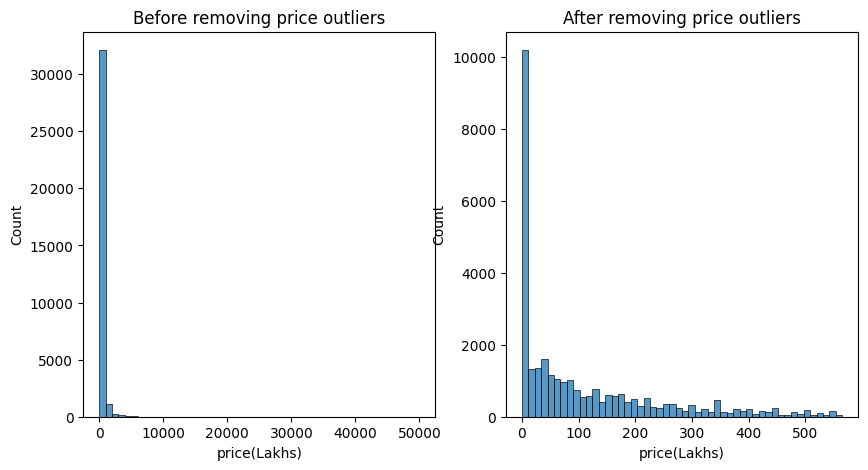

In [218]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x=pipe_y_train, bins=50)
plt.title("Before removing price outliers")

plt.subplot(1,2,2)
sns.histplot(x=pipe_y_train_filtered, bins=50)
plt.title("After removing price outliers")

plt.show()

`As we see huge difference in distribution of price lets experiment and check score`

In [208]:
pipeline.fit(pipe_X_train_filtered, np.log1p(pipe_y_train_filtered))
filter_pred=pipeline.predict(pipe_X_test_filtered)
print("r2: ", r2_score(pipe_y_test_filtered, np.expm1(filter_pred)))

C:\Users\hp\AppData\Local\Temp\ipykernel_18856\847699156.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for key, val in X.groupby(['location', 'location_province'])['location_city']
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\847699156.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for key, val in X.groupby('location')['location_city']
C:\Users\hp\AppData\Local\Temp\ipykernel_18856\847699156.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

r2:  0.835856030035248


`We are expriencing a huge difference b/w r2_score before and after removing price outliers so we weill stick with after removing`

## Test model with Mock Data

In [209]:
input_data = pd.DataFrame({
    'type': ['Office', 'Office'],
    'area(sqft)': [450.0, 450.0],
    'purpose': ['For Rent', 'For Sale'],
    'bedroom': [0.0, 0.0],
    'bath': [1.0, 1.0],
    'initial_amount(Lakhs)': [0.0, 0.0],
    'monthly_installment(Lakhs)': [0.0, 0.0],
    'remaining_installments': [0.0, 0.0],
    'location': ['Wazirabad Road', 'Wazirabad Road'],
    'location_city': ['Sambrial', 'Sambrial'],
    'location_province': ['Punjab', 'Punjab']
})
input_data
pred = pipeline.predict(input_data)
np.expm1(pred)

array([0.29794705, 8.748888  ], dtype=float32)

## Save model using pickle

In [212]:
import pickle
with open('../train_model/real-estate-pakistan_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)